# GABARITO - Etapa 1: Análise Exploratória de Dados (EDA)
## Dataset: Housing Prices

---

**OBJETIVO GERAL DA ETAPA 1:**

A Análise Exploratória de Dados (EDA) é a **fundação de todo projeto de Machine Learning**. Nesta etapa, você:

1. **Compreende o problema de negócio** através dos dados disponíveis
2. **Identifica padrões e anomalias** que podem impactar o modelo
3. **Detecta problemas de qualidade** (valores faltantes, outliers, inconsistências)
4. **Descobre relações entre variáveis** que podem ser preditivas
5. **Toma decisões informadas** sobre as próximas etapas (limpeza, feature engineering, escolha de algoritmo)

**POR QUE É CRUCIAL?**

- Um modelo só será tão bom quanto os dados que o alimentam (**"Garbage In, Garbage Out"**)
- Pular a EDA pode resultar em modelos enviesados, imprecisos ou que falham em produção
- A EDA economiza tempo ao revelar antecipadamente problemas que causariam erros nas etapas seguintes
- Insights da EDA guiam a estratégia de preprocessamento (ex: qual método de imputação usar?)

---

In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Melhorar visualização
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

---

## 1. Carregamento e Visão Geral dos Dados

### 📌 **POR QUE ESTA ETAPA É IMPORTANTE?**

Esta é a **primeira interação com os dados**. Aqui você:

1. **Valida o carregamento:** Garante que o arquivo foi lido corretamente (sem corrupção, encoding correto)
2. **Entende a dimensão do problema:** Quantas observações? Quantas features? Isso impacta tempo de processamento e escolha de algoritmo
3. **Identifica tipos de dados:** Numéricas vs categóricas — cada tipo requer tratamento diferente
4. **Define a variável alvo:** O que queremos prever? No caso, **price_brl** (preço do imóvel)
5. **Detecta problemas óbvios:** Colunas duplicadas, valores estranhos nas primeiras/últimas linhas

**IMPACTO NO PROJETO:**
- Sem entender a estrutura dos dados, você não consegue planejar o preprocessamento
- Identificar a variável alvo incorretamente pode resultar em um modelo que resolve o problema errado
- Saber os tipos de dados guia as escolhas de visualização e transformação

---

In [2]:
# Carregar o dataset
df = pd.read_csv('/home/durval/Documentos/PROJETOS/ml-projeto-final/datasets/housing_prices.csv')

print("="*80)
print("DATASET CARREGADO COM SUCESSO!")
print("="*80)

DATASET CARREGADO COM SUCESSO!


In [3]:
# Visualizar primeiras linhas
print("\nPRIMEIRAS 5 LINHAS DO DATASET:")
print("-" * 80)
df.head()


PRIMEIRAS 5 LINHAS DO DATASET:
--------------------------------------------------------------------------------


,property_id,built_area_sqm,bedrooms,bathrooms,parking_spaces,location,property_age_years,floor_number,view_type,condo_fee,infrastructure,has_security,has_pool,has_elevator,property_type,furnished,nearby_metro_km,price_brl
0,PROP00084,86.35,3,2,1,Subúrbio,7,10.0,NaN,634.94,Básica,No,Yes,Yes,Casa,No,1.35,6.96e+05
1,PROP00997,55.20,3,6,1,Zona Norte,3,11.0,NaN,904.42,Completa,Yes,No,Yes,Casa,No,3.34,8.73e+05
2,PROP00426,NaN,2,3,2,Zona Oeste,15,8.0,City,446.98,Completa,No,No,NO,Casa,Yes,1.86,8.44e+05
3,PROP02411,164.74,1,2,1,Zona Leste,20,7.0,City,625.63,Premium,Yes,No,No,Apartamento,No,NaN,9.86e+05
4,PROP00179,114.22,4,2,1,Subúrbio,25,19.0,City,194.77,Completa,Yes,Yes,Yes,Apartamento,No,2.29,1.23e+06


In [4]:
# Visualizar últimas linhas
print("\nÚLTIMAS 5 LINHAS DO DATASET:")
print("-" * 80)
df.tail()


ÚLTIMAS 5 LINHAS DO DATASET:
--------------------------------------------------------------------------------


,property_id,built_area_sqm,bedrooms,bathrooms,parking_spaces,location,property_age_years,floor_number,view_type,condo_fee,infrastructure,has_security,has_pool,has_elevator,property_type,furnished,nearby_metro_km,price_brl
2505,PROP00104,58.57,4,2,1,Subúrbio,0,17.0,City,839.90,Básica,No,No,Yes,Casa,Yes,3.24,7.06e+05
2506,PROP01749,111.56,4,2,1,Centro,31,12.0,City,673.91,Premium,No,No,No,Casa,No,4.66,1.13e+06
2507,PROP01402,72.33,3,6,1,Zona Sul,37,0.0,NaN,100.93,Básica,Yes,No,No,Apartamento,No,NaN,1.01e+06
2508,PROP02374,159.00,2,3,2,Subúrbio,25,0.0,NaN,243.81,Básica,No,No,Yes,Casa,No,2.22,8.20e+05
2509,PROP01700,201.15,3,6,2,Centro,5,14.0,NaN,310.81,Básica,No,No,Yes,Casa,No,1.75,1.41e+06


In [5]:
# Dimensões do dataset
print("\nDIMENSÕES DO DATASET:")
print("-" * 80)
print(f"Número de linhas (observações): {df.shape[0]:,}")
print(f"Número de colunas (features): {df.shape[1]}")
print(f"\nIsso significa que temos {df.shape[0]:,} imóveis com {df.shape[1]} características cada.")


DIMENSÕES DO DATASET:
--------------------------------------------------------------------------------
Número de linhas (observações): 2,510
Número de colunas (features): 18

Isso significa que temos 2,510 imóveis com 18 características cada.


In [6]:
# Informações gerais
print("\n🔍 INFORMAÇÕES GERAIS DO DATASET:")
print("=" * 80)
df.info()

# Explicação detalhada da saída do df.info()
print("\n" + "=" * 80)
print("📚 COMO INTERPRETAR A SAÍDA ACIMA:")
print("=" * 80)

print("\n1️⃣ **RangeIndex: 2510 entries, 0 to 2509**")
print("   → Temos 2.510 linhas no dataset (índice de 0 a 2509)")
print("   → Cada linha representa UM imóvel único\n")

print("2️⃣ **Data columns (total 18 columns)**")
print("   → Temos 18 colunas (features/variáveis)")
print("   → Cada coluna representa uma característica dos imóveis\n")

print("3️⃣ **Coluna '#'**")
print("   → Número sequencial da coluna (0 a 17)\n")

print("4️⃣ **Coluna 'Column'**")
print("   → Nome da variável/feature\n")

print("5️⃣ **Coluna 'Non-Null Count'**")
print("   → Quantos valores NÃO ESTÃO FALTANDO em cada coluna")
print("   → Exemplo: 'built_area_sqm' tem 2221 valores preenchidos")
print("   → ⚠️  Se < 2510, há valores faltantes (NaN)!")
print("   → Cálculo de faltantes: 2510 - 2221 = 289 valores NaN\n")

print("6️⃣ **Coluna 'Dtype'**")
print("   → Tipo de dado da coluna:")
print("      • float64 = Número decimal (ex: 86.35, 634.94)")
print("      • int64 = Número inteiro (ex: 3, 7, 10)")
print("      • object = Texto/String (ex: 'Centro', 'Yes', 'Casa')")
print("   → ⚠️  'object' geralmente indica variável CATEGÓRICA\n")

print("7️⃣ **dtypes: float64(5), int64(4), object(9)**")
print("   → Resumo dos tipos:")
print("      • 5 colunas do tipo float64 (decimais)")
print("      • 4 colunas do tipo int64 (inteiros)")
print("      • 9 colunas do tipo object (texto/categórico)\n")

print("8️⃣ **memory usage: 353.1+ KB**")
print("   → Espaço que o dataset ocupa na memória RAM")
print("   → Útil para saber se o dataset é grande ou pequeno\n")

print("=" * 80)
print("💡 DICA IMPORTANTE:")
print("=" * 80)
print("Compare 'Non-Null Count' com o total de linhas (2510):")
print("• Se IGUAL a 2510 → Coluna COMPLETA (sem NaN) ✅")
print("• Se MENOR que 2510 → Coluna COM valores faltantes ⚠️")
print("\nExemplos:")
print("✅ 'bedrooms': 2510 non-null → SEM valores faltantes")
print("⚠️  'built_area_sqm': 2221 non-null → 289 valores faltantes (11.5%)")
print("⚠️  'view_type': 906 non-null → 1604 valores faltantes (63.9%!)")
print("=" * 80)


🔍 INFORMAÇÕES GERAIS DO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_id         2510 non-null   object 
 1   built_area_sqm      2221 non-null   float64
 2   bedrooms            2510 non-null   int64  
 3   bathrooms           2510 non-null   int64  
 4   parking_spaces      2510 non-null   int64  
 5   location            2510 non-null   object 
 6   property_age_years  2510 non-null   int64  
 7   floor_number        2327 non-null   float64
 8   view_type           906 non-null    object 
 9   condo_fee           2383 non-null   float64
 10  infrastructure      2324 non-null   object 
 11  has_security        2510 non-null   object 
 12  has_pool            2510 non-null   object 
 13  has_elevator        2510 non-null   object 
 14  property_type       2510 non-null   object 
 15  furnished           2

#### 🔍 **Entendendo o `.info()` - Guia Completo**

O método `.info()` é **uma das ferramentas mais importantes** da EDA. Ele fornece um resumo técnico completo do dataset em uma única saída. Vamos aprender a interpretar cada parte:

**O que o `.info()` mostra?**
1. **Número total de linhas** (observações)
2. **Número total de colunas** (features)
3. **Nome de cada coluna**
4. **Quantidade de valores não-nulos** (preenchidos) em cada coluna
5. **Tipo de dado** de cada coluna (float, int, object)
6. **Uso de memória** do dataset

**Por que isso é importante?**
- Identifica **valores faltantes** rapidamente (quando Non-Null Count < total de linhas)
- Mostra **tipos de dados** para saber quais transformações aplicar
- Revela **problemas de qualidade** (ex: número deveria ser int mas está como object)

---

In [7]:
# Criar uma tabela resumida mais visual e fácil de entender
print("\nTABELA RESUMIDA DO DATASET:")
print("=" * 80)

info_summary = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo de Dado': df.dtypes.values,
    'Valores Preenchidos': [df[col].count() for col in df.columns],
    'Valores Faltantes': [df[col].isnull().sum() for col in df.columns],
    '% Faltantes': [round((df[col].isnull().sum() / len(df)) * 100, 2) for col in df.columns],
    'Categoria': ['Numérica' if df[col].dtype in ['int64', 'float64'] else 'Categórica' for col in df.columns]
})

# Ordenar por % de valores faltantes (decrescente)
info_summary_sorted = info_summary.sort_values('% Faltantes', ascending=False)

print(info_summary_sorted.to_string(index=False))

print("\n" + "=" * 80)
print("RESUMO ESTATÍSTICO:")
print("=" * 80)
print(f"Total de observações: {len(df):,}")
print(f"Total de features: {len(df.columns)}")
print(f"   • Numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"   • Categóricas: {len(df.select_dtypes(include=['object']).columns)}")
print(f"\nColunas COM valores faltantes: {len(info_summary[info_summary['Valores Faltantes'] > 0])}")
print(f"Colunas SEM valores faltantes: {len(info_summary[info_summary['Valores Faltantes'] == 0])}")
print("=" * 80)


TABELA RESUMIDA DO DATASET:
            Coluna Tipo de Dado  Valores Preenchidos  Valores Faltantes  % Faltantes  Categoria
         view_type       object                  906               1604        63.90 Categórica
    built_area_sqm      float64                 2221                289        11.51   Numérica
   nearby_metro_km      float64                 2227                283        11.27   Numérica
    infrastructure       object                 2324                186         7.41 Categórica
      floor_number      float64                 2327                183         7.29   Numérica
         condo_fee      float64                 2383                127         5.06   Numérica
       property_id       object                 2510                  0         0.00 Categórica
    parking_spaces        int64                 2510                  0         0.00   Numérica
          location       object                 2510                  0         0.00 Categórica
          b

In [8]:
# Estatísticas descritivas
print("\n📈 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):")
print("=" * 80)
df.describe()


📈 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):


,built_area_sqm,bedrooms,bathrooms,parking_spaces,property_age_years,floor_number,condo_fee,nearby_metro_km,price_brl
count,2221.00,2510.00,2510.00,2510.00,2510.00,2327.00,2383.00,2227.00,2.51e+03
mean,104.12,2.56,2.29,1.61,24.58,8.04,549.87,2.15,8.80e+05
std,65.01,1.15,0.99,0.93,15.77,7.53,582.49,1.30,2.04e+05
min,-39.38,0.00,0.00,0.00,0.00,-4.00,0.62,0.00,1.92e+05
25%,74.15,2.00,2.00,1.00,12.00,1.00,295.46,1.13,7.38e+05
50%,101.44,2.00,2.00,2.00,24.00,7.00,510.60,2.02,8.75e+05
75%,126.77,3.00,3.00,2.00,37.00,13.00,706.16,3.01,1.02e+06
max,945.92,12.00,6.00,5.00,200.00,86.00,9648.95,6.70,1.58e+06


In [9]:
# Estatísticas descritivas
print("\n📈 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):")
print("=" * 80)
df.describe()

# Explicação detalhada da saída do df.describe()
print("\n" + "=" * 80)
print("📚 COMO INTERPRETAR A SAÍDA DO .describe():")
print("=" * 80)

print("\n🎯 O método .describe() calcula estatísticas resumidas para TODAS as colunas NUMÉRICAS.")
print("Cada linha representa uma métrica estatística diferente:\n")

print("=" * 80)
print("📊 LINHA POR LINHA - O QUE CADA MÉTRICA SIGNIFICA:")
print("=" * 80)

print("\n1️⃣ **count** (Contagem)")
print("   📌 O que é: Quantidade de valores NÃO NULOS (preenchidos) na coluna")
print("   🔍 Como ler: Se count < total de linhas → há valores faltantes (NaN)")
print("   💡 Exemplo: Se 'built_area_sqm' tem count=2221 e o dataset tem 2510 linhas,")
print("              então 2510 - 2221 = 289 valores estão faltando (11.5%)")
print("   ⚠️  IMPORTANTE: .describe() ignora NaN automaticamente!\n")

print("2️⃣ **mean** (Média Aritmética)")
print("   📌 O que é: Soma de todos os valores ÷ quantidade de valores")
print("   🔍 Como ler: Valor 'central' considerando TODOS os dados")
print("   💡 Exemplo: Se mean de 'price_brl' = 850.000, o preço médio é R$ 850k")
print("   ⚠️  CUIDADO: Média é SENSÍVEL a outliers!")
print("              → Poucos imóveis caríssimos podem puxar a média para cima")
print("              → Se mean >> mediana (50%), há outliers à direita\n")

print("3️⃣ **std** (Desvio Padrão / Standard Deviation)")
print("   📌 O que é: Mede a DISPERSÃO dos dados em relação à média")
print("   🔍 Como ler:")
print("      • std BAIXO → Dados concentrados perto da média (pouca variação)")
print("      • std ALTO → Dados espalhados, longe da média (muita variação)")
print("   💡 Exemplo: Se 'bedrooms' tem mean=3 e std=0.5:")
print("              → Maioria dos imóveis tem entre 2.5 e 3.5 quartos (próximo da média)")
print("              Se 'price_brl' tem mean=850k e std=300k:")
print("              → Preços variam muito! De ~550k a ~1.150k (grande dispersão)")
print("   📐 Fórmula: std = √[Σ(valor - média)² / n]")
print("   ⚠️  IMPORTANTE: std alto indica heterogeneidade nos dados\n")

print("4️⃣ **min** (Mínimo)")
print("   📌 O que é: O MENOR valor encontrado na coluna")
print("   🔍 Como ler: Limite inferior dos dados")
print("   💡 Exemplo: Se min de 'bedrooms' = 1 → o menor imóvel tem 1 quarto")
print("   ⚠️  ATENÇÃO: Valores min muito distantes de Q1 podem ser outliers!\n")

print("5️⃣ **25% (Q1 - Primeiro Quartil)")
print("   📌 O que é: 25% dos dados estão ABAIXO deste valor")
print("   🔍 Como ler: Marca o limite do 1º quarto dos dados (ordenados)")
print("   💡 Exemplo: Se Q1 de 'price_brl' = 600k:")
print("              → 25% dos imóveis custam MENOS que R$ 600k")
print("              → 75% dos imóveis custam MAIS que R$ 600k")
print("   📊 Uso: Define a borda inferior da 'caixa' no boxplot\n")

print("6️⃣ **50% (Q2 - Segundo Quartil = MEDIANA)")
print("   📌 O que é: Valor do MEIO quando os dados estão ordenados")
print("   🔍 Como ler: 50% dos dados estão abaixo E 50% estão acima")
print("   💡 Exemplo: Se mediana de 'price_brl' = 750k:")
print("              → Metade dos imóveis custa MENOS que R$ 750k")
print("              → Metade dos imóveis custa MAIS que R$ 750k")
print("   ✅ VANTAGEM: Mediana é ROBUSTA a outliers (não é afetada por valores extremos)")
print("   🔍 Comparação com média:")
print("      • Se mean ≈ mediana → Distribuição simétrica")
print("      • Se mean > mediana → Distribuição assimétrica à direita (outliers altos)")
print("      • Se mean < mediana → Distribuição assimétrica à esquerda (outliers baixos)\n")

print("7️⃣ **75% (Q3 - Terceiro Quartil)")
print("   📌 O que é: 75% dos dados estão ABAIXO deste valor")
print("   🔍 Como ler: Marca o limite do 3º quarto dos dados")
print("   💡 Exemplo: Se Q3 de 'price_brl' = 1.000k:")
print("              → 75% dos imóveis custam MENOS que R$ 1.000k")
print("              → 25% dos imóveis custam MAIS que R$ 1.000k (os mais caros)")
print("   📊 Uso: Define a borda superior da 'caixa' no boxplot\n")

print("8️⃣ **max** (Máximo)")
print("   📌 O que é: O MAIOR valor encontrado na coluna")
print("   🔍 Como ler: Limite superior dos dados")
print("   💡 Exemplo: Se max de 'price_brl' = 5.000k → o imóvel mais caro custa R$ 5M")
print("   ⚠️  ATENÇÃO: Valores max muito distantes de Q3 podem ser outliers!\n")

print("=" * 80)
print("🧮 MÉTRICAS DERIVADAS IMPORTANTES:")
print("=" * 80)

print("\n📏 **IQR (Intervalo Interquartil) = Q3 - Q1**")
print("   → Mede a dispersão dos 50% CENTRAIS dos dados")
print("   → Usado para detectar outliers:")
print("      • Outlier inferior: valor < Q1 - 1.5 × IQR")
print("      • Outlier superior: valor > Q3 + 1.5 × IQR")
print("   💡 Exemplo: Se Q1=600k, Q3=1000k → IQR = 400k")
print("              Outliers são valores < 0 ou > 1.600k\n")

print("📏 **Range (Amplitude) = max - min**")
print("   → Amplitude total dos dados (do menor ao maior valor)")
print("   💡 Exemplo: Se min=300k, max=5000k → Range = 4.700k\n")

print("=" * 80)
print("💡 DICAS PRÁTICAS:")
print("=" * 80)

print("\n✅ **Para identificar OUTLIERS:**")
print("   → Compare (max - Q3) com (Q3 - mediana)")
print("   → Se max está MUITO longe de Q3 → provável outlier superior")
print("   → Compare (Q1 - min) com (mediana - Q1)")
print("   → Se min está MUITO longe de Q1 → provável outlier inferior\n")

print("✅ **Para identificar ASSIMETRIA:**")
print("   → Se mean > mediana → Assimetria à DIREITA (outliers altos)")
print("   → Se mean < mediana → Assimetria à ESQUERDA (outliers baixos)")
print("   → Se mean ≈ mediana → Distribuição SIMÉTRICA\n")

print("✅ **Para decidir IMPUTAÇÃO:**")
print("   → Se std é ALTO e há outliers → Use MEDIANA (robusta)")
print("   → Se std é BAIXO e sem outliers → Use MÉDIA (mais precisa)\n")

print("✅ **Para detectar ERROS DE COLETA:**")
print("   → min ou max com valores impossíveis (ex: idade negativa)")
print("   → std = 0 → Todos os valores são iguais (suspeito!)")
print("   → count muito baixo → Muitos valores faltantes\n")

print("=" * 80)
print("🎓 EXEMPLO PRÁTICO DE INTERPRETAÇÃO:")
print("=" * 80)

# Pegar uma coluna exemplo para demonstrar
example_col = 'price_brl'
print(f"\n📊 Analisando a coluna '{example_col}':\n")
print(f"count  = {df[example_col].count():,.0f}  → Temos {df[example_col].count():,} preços válidos")
print(f"mean   = {df[example_col].mean():,.2f}  → Preço médio é R$ {df[example_col].mean():,.0f}")
print(f"std    = {df[example_col].std():,.2f}  → Preços variam ±R$ {df[example_col].std():,.0f} da média")
print(f"min    = {df[example_col].min():,.2f}  → Imóvel mais barato: R$ {df[example_col].min():,.0f}")
print(f"25%    = {df[example_col].quantile(0.25):,.2f}  → 25% custam menos que R$ {df[example_col].quantile(0.25):,.0f}")
print(f"50%    = {df[example_col].median():,.2f}  → Preço mediano é R$ {df[example_col].median():,.0f}")
print(f"75%    = {df[example_col].quantile(0.75):,.2f}  → 75% custam menos que R$ {df[example_col].quantile(0.75):,.0f}")
print(f"max    = {df[example_col].max():,.2f}  → Imóvel mais caro: R$ {df[example_col].max():,.0f}")

print(f"\n🔍 INTERPRETAÇÃO:")
if df[example_col].mean() > df[example_col].median():
    diff = df[example_col].mean() - df[example_col].median()
    print(f"   • Média (R$ {df[example_col].mean():,.0f}) > Mediana (R$ {df[example_col].median():,.0f})")
    print(f"   • Diferença: R$ {diff:,.0f}")
    print(f"   • ⚠️  ASSIMETRIA À DIREITA: Há imóveis caríssimos puxando a média para cima")
    print(f"   • 💡 DECISÃO: Considerar transformação logarítmica ou usar mediana na imputação")

print("\n" + "=" * 80)


📈 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):

📚 COMO INTERPRETAR A SAÍDA DO .describe():

🎯 O método .describe() calcula estatísticas resumidas para TODAS as colunas NUMÉRICAS.
Cada linha representa uma métrica estatística diferente:

📊 LINHA POR LINHA - O QUE CADA MÉTRICA SIGNIFICA:

1️⃣ **count** (Contagem)
   📌 O que é: Quantidade de valores NÃO NULOS (preenchidos) na coluna
   🔍 Como ler: Se count < total de linhas → há valores faltantes (NaN)
   💡 Exemplo: Se 'built_area_sqm' tem count=2221 e o dataset tem 2510 linhas,
              então 2510 - 2221 = 289 valores estão faltando (11.5%)
   ⚠️  IMPORTANTE: .describe() ignora NaN automaticamente!

2️⃣ **mean** (Média Aritmética)
   📌 O que é: Soma de todos os valores ÷ quantidade de valores
   🔍 Como ler: Valor 'central' considerando TODOS os dados
   💡 Exemplo: Se mean de 'price_brl' = 850.000, o preço médio é R$ 850k
   ⚠️  CUIDADO: Média é SENSÍVEL a outliers!
              → Poucos imóveis caríssimos podem puxar a média pa

In [10]:
# Criar análise visual comparativa das estatísticas
print("\n📊 ANÁLISE COMPARATIVA: Média vs Mediana (Detecção de Assimetria)")
print("=" * 80)

# Garantir que numeric_cols está definida
if 'numeric_cols' not in dir():
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

comparison_data = []
for col in numeric_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    diff = mean_val - median_val
    diff_percent = (diff / median_val * 100) if median_val != 0 else 0
    
    # Classificar assimetria
    if abs(diff_percent) < 5:
        skew_type = "✅ Simétrica"
        recommendation = "Use Média"
    elif diff_percent > 5:
        skew_type = "⚠️  Assimétrica →"
        recommendation = "Use Mediana"
    else:
        skew_type = "⚠️  Assimétrica ←"
        recommendation = "Use Mediana"
    
    comparison_data.append({
        'Variável': col,
        'Média': round(mean_val, 2),
        'Mediana': round(median_val, 2),
        'Diferença': round(diff, 2),
        'Diff %': round(diff_percent, 1),
        'Distribuição': skew_type,
        'Imputação': recommendation
    })

comparison_df = pd.DataFrame(comparison_data)

# Ordenar por % de diferença (valor absoluto) para destacar as mais assimétricas
comparison_df['abs_diff'] = comparison_df['Diff %'].abs()
comparison_df_sorted = comparison_df.sort_values('abs_diff', ascending=False).drop('abs_diff', axis=1)

print(comparison_df_sorted.to_string(index=False))

print("\n" + "=" * 80)
print("📖 COMO INTERPRETAR A TABELA:")
print("=" * 80)

print("\n1️⃣ **Coluna 'Diferença' = Média - Mediana**")
print("   → Mede o quanto a média se afasta da mediana")
print("   → Valores grandes indicam presença de outliers\n")

print("2️⃣ **Coluna 'Diff %' = (Diferença / Mediana) × 100**")
print("   → Diferença percentual relativa")
print("   → Permite comparar assimetria entre variáveis de escalas diferentes\n")

print("3️⃣ **Coluna 'Distribuição':**")
print("   ✅ Simétrica (|Diff %| < 5%):")
print("      → Média e mediana estão próximas")
print("      → Distribuição balanceada, sem outliers significativos")
print("      → Exemplo: Distribuição normal (curva de Gauss)")
print("")
print("   ⚠️  Assimétrica → (Diff % > 5%):")
print("      → Média > Mediana")
print("      → 'Cauda longa à DIREITA'")
print("      → Poucos valores MUITO ALTOS puxam a média para cima")
print("      → Exemplo: Preços de imóveis (poucos muito caros)")
print("")
print("   ⚠️  Assimétrica ← (Diff % < -5%):")
print("      → Média < Mediana")
print("      → 'Cauda longa à ESQUERDA'")
print("      → Poucos valores MUITO BAIXOS puxam a média para baixo")
print("      → Exemplo: Idades (poucos muito jovens)\n")

print("4️⃣ **Coluna 'Imputação':**")
print("   → Recomendação de qual medida usar para preencher valores faltantes")
print("   → 'Use Média': Para distribuições simétricas")
print("   → 'Use Mediana': Para distribuições assimétricas (robusta a outliers)\n")

print("=" * 80)
print("💡 INSIGHTS IMPORTANTES:")
print("=" * 80)

# Contar distribuições
simetricas = comparison_df_sorted[comparison_df_sorted['Distribuição'] == '✅ Simétrica'].shape[0]
assim_direita = comparison_df_sorted[comparison_df_sorted['Distribuição'] == '⚠️  Assimétrica →'].shape[0]
assim_esquerda = comparison_df_sorted[comparison_df_sorted['Distribuição'] == '⚠️  Assimétrica ←'].shape[0]

print(f"\n📊 RESUMO DAS DISTRIBUIÇÕES:")
print(f"   • {simetricas} variáveis com distribuição SIMÉTRICA ✅")
print(f"   • {assim_direita} variáveis com assimetria à DIREITA ⚠️  (outliers altos)")
print(f"   • {assim_esquerda} variáveis com assimetria à ESQUERDA ⚠️  (outliers baixos)")

# Destacar as mais assimétricas
print(f"\n🔴 VARIÁVEIS MAIS ASSIMÉTRICAS (Top 3):")
top_3_assym = comparison_df_sorted.head(3)
for idx, row in top_3_assym.iterrows():
    print(f"   {idx+1}. {row['Variável']}: Diff = {row['Diff %']:.1f}% → {row['Distribuição']}")

print("\n⚠️  IMPLICAÇÕES PARA O PROJETO:")
print("   • Variáveis muito assimétricas podem precisar de TRANSFORMAÇÃO LOGARÍTMICA")
print("   • Na Etapa 2 (Preprocessamento), use MEDIANA para imputar variáveis assimétricas")
print("   • Na Etapa 4 (Modelagem), considere algoritmos robustos a outliers (ex: Random Forest)")

print("=" * 80)


📊 ANÁLISE COMPARATIVA: Média vs Mediana (Detecção de Assimetria)
          Variável     Média   Mediana  Diferença  Diff %      Distribuição   Imputação
          bedrooms      2.56      2.00       0.56    28.1 ⚠️  Assimétrica → Use Mediana
    parking_spaces      1.61      2.00      -0.39   -19.3 ⚠️  Assimétrica ← Use Mediana
      floor_number      8.04      7.00       1.04    14.8 ⚠️  Assimétrica → Use Mediana
         bathrooms      2.29      2.00       0.29    14.4 ⚠️  Assimétrica → Use Mediana
         condo_fee    549.87    510.60      39.27     7.7 ⚠️  Assimétrica → Use Mediana
   nearby_metro_km      2.15      2.02       0.13     6.2 ⚠️  Assimétrica → Use Mediana
    built_area_sqm    104.12    101.44       2.68     2.6       ✅ Simétrica   Use Média
property_age_years     24.58     24.00       0.58     2.4       ✅ Simétrica   Use Média
         price_brl 879730.45 874631.20    5099.25     0.6       ✅ Simétrica   Use Média

📖 COMO INTERPRETAR A TABELA:

1️⃣ **Coluna 'Diferença

In [11]:
# Visualização: Dispersão (Coeficiente de Variação)
print("\n📊 ANÁLISE DE DISPERSÃO: Coeficiente de Variação (CV)")
print("=" * 80)
print("O Coeficiente de Variação mede a dispersão RELATIVA dos dados")
print("CV = (Desvio Padrão / Média) × 100%")
print("=" * 80)

# Garantir que numeric_cols está definida
if 'numeric_cols' not in dir():
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cv_data = []
for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    cv = (std_val / mean_val * 100) if mean_val != 0 else 0
    
    # Classificar dispersão
    if cv < 15:
        dispersion = "🟢 Baixa"
    elif cv < 30:
        dispersion = "🟡 Moderada"
    else:
        dispersion = "🔴 Alta"
    
    cv_data.append({
        'Variável': col,
        'Média': f'{mean_val:,.2f}',
        'Desvio Padrão': f'{std_val:,.2f}',
        'CV (%)': f'{cv:.1f}%',
        'Dispersão': dispersion
    })

cv_df = pd.DataFrame(cv_data).sort_values('CV (%)', ascending=False, 
                                          key=lambda x: x.str.rstrip('%').astype(float))
print(cv_df.to_string(index=False))

print("\n" + "=" * 80)
print("📖 INTERPRETAÇÃO DO COEFICIENTE DE VARIAÇÃO:")
print("=" * 80)
print("🟢 Baixa (CV < 15%):     Dados homogêneos, pouca variação")
print("🟡 Moderada (15-30%):    Variação moderada, dados intermediários")
print("🔴 Alta (CV > 30%):      Dados heterogêneos, muita variação")
print("\n💡 IMPLICAÇÃO PARA ML:")
print("   • CV alto → Considerar normalização (StandardScaler)")
print("   • CV muito alto → Possível presença de outliers extremos")
print("   • Variáveis com CV muito diferente → Normalização é ESSENCIAL")
print("=" * 80)


📊 ANÁLISE DE DISPERSÃO: Coeficiente de Variação (CV)
O Coeficiente de Variação mede a dispersão RELATIVA dos dados
CV = (Desvio Padrão / Média) × 100%
          Variável      Média Desvio Padrão CV (%)  Dispersão
         condo_fee     549.87        582.49 105.9%     🔴 Alta
      floor_number       8.04          7.53  93.7%     🔴 Alta
property_age_years      24.58         15.77  64.1%     🔴 Alta
    built_area_sqm     104.12         65.01  62.4%     🔴 Alta
   nearby_metro_km       2.15          1.30  60.6%     🔴 Alta
    parking_spaces       1.61          0.93  57.6%     🔴 Alta
          bedrooms       2.56          1.15  45.0%     🔴 Alta
         bathrooms       2.29          0.99  43.2%     🔴 Alta
         price_brl 879,730.45    203,692.28  23.2% 🟡 Moderada

📖 INTERPRETAÇÃO DO COEFICIENTE DE VARIAÇÃO:
🟢 Baixa (CV < 15%):     Dados homogêneos, pouca variação
🟡 Moderada (15-30%):    Variação moderada, dados intermediários
🔴 Alta (CV > 30%):      Dados heterogêneos, muita variação

💡 

#### 📈 **Entendendo o `.describe()` - Guia Completo de Estatísticas Descritivas**

O método `.describe()` é uma **ferramenta essencial** para entender a **distribuição e características** das variáveis numéricas. Ele calcula automaticamente 8 métricas estatísticas fundamentais.

**O que o `.describe()` mostra?**
1. **count** — Quantidade de valores não-nulos
2. **mean** — Média aritmética
3. **std** — Desvio padrão (dispersão)
4. **min** — Valor mínimo
5. **25% (Q1)** — Primeiro quartil
6. **50% (Q2)** — Mediana (segundo quartil)
7. **75% (Q3)** — Terceiro quartil
8. **max** — Valor máximo

**Por que isso é importante?**
- Identifica **outliers** (valores extremos) comparando min/max com quartis
- Detecta **assimetria** comparando média com mediana
- Revela **dispersão** através do desvio padrão
- Guia decisões sobre **imputação** (média vs mediana)
- Auxilia na **normalização** (entender escalas diferentes)

**Conceitos-Chave:**
- **Quartis dividem os dados em 4 partes iguais** (25% cada)
- **IQR (Q3 - Q1)** mede a dispersão dos 50% centrais
- **Mediana é robusta** a outliers (melhor que média em distribuições assimétricas)

---

In [12]:
# Separar variáveis por tipo
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\n📊 CLASSIFICAÇÃO DAS VARIÁVEIS:")
print("=" * 80)
print(f"\n🔢 VARIÁVEIS NUMÉRICAS ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"   • {col}")

print(f"\n🏷️  VARIÁVEIS CATEGÓRICAS ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"   • {col}")


📊 CLASSIFICAÇÃO DAS VARIÁVEIS:

🔢 VARIÁVEIS NUMÉRICAS (9):
   • built_area_sqm
   • bedrooms
   • bathrooms
   • parking_spaces
   • property_age_years
   • floor_number
   • condo_fee
   • nearby_metro_km
   • price_brl

🏷️  VARIÁVEIS CATEGÓRICAS (9):
   • property_id
   • location
   • view_type
   • infrastructure
   • has_security
   • has_pool
   • has_elevator
   • property_type
   • furnished


### 📝 **DOCUMENTAÇÃO - TAREFA 1:**

#### **Descrição do Dataset:**
O dataset **Housing Prices** contém informações sobre imóveis (casas e apartamentos) no mercado imobiliário brasileiro. Cada linha representa um imóvel único com suas características físicas, localização e preço.

#### **Dimensões:**
- **Linhas:** 5.000 imóveis
- **Colunas:** 18 features

#### **Variável Alvo:**
- **`price_brl`** — Preço do imóvel em reais (R$)
- **Tipo de problema:** Regressão (prever um valor contínuo)

#### **Variáveis Preditoras:**

**Numéricas (7):**
1. `built_area_sqm` — Área construída em m²
2. `bedrooms` — Número de quartos
3. `bathrooms` — Número de banheiros
4. `parking_spaces` — Número de vagas de garagem
5. `property_age_years` — Idade do imóvel em anos
6. `floor_number` — Andar do imóvel
7. `condo_fee` — Taxa de condomínio (R$)
8. `nearby_metro_km` — Distância ao metrô mais próximo (km)

**Categóricas (10):**
1. `property_id` — Identificador único (não será usado no modelo)
2. `location` — Região do imóvel (Centro, Zona Norte, etc.)
3. `view_type` — Tipo de vista (City, None)
4. `infrastructure` — Qualidade da infraestrutura (Básica, Completa, Premium)
5. `has_security` — Possui segurança (Yes/No)
6. `has_pool` — Possui piscina (Yes/No)
7. `has_elevator` — Possui elevador (Yes/No/NO)
8. `property_type` — Tipo do imóvel (Casa, Apartamento)
9. `furnished` — Está mobiliado (Yes/No)

#### **Por que identificar a variável alvo é crucial?**
- Define o **tipo de modelo** (regressão vs classificação)
- Guia as **métricas de avaliação** (R², RMSE, MAE para regressão)
- Influencia a **análise bivariada** (quais features se relacionam com o preço?)

---

---

## 2. Análise de Qualidade dos Dados

### 📌 **POR QUE ESTA ETAPA É IMPORTANTE?**

Dados do mundo real são **sempre imperfeitos**. Esta etapa identifica:

1. **Valores Faltantes (NaN):**
   - Podem causar erros ao treinar o modelo
   - Indicam problemas na coleta de dados
   - Exigem estratégias de imputação (média, mediana, moda, remoção)
   - **Impacto:** Modelos não aceitam NaN — você deve tratá-los na Etapa 2

2. **Outliers:**
   - Valores extremos que podem distorcer o modelo
   - Podem ser erros de digitação ou casos raros legítimos
   - **Impacto:** Modelos lineares são sensíveis a outliers; árvores de decisão, não

3. **Inconsistências:**
   - Valores duplicados, categorias com grafia diferente ("Yes" vs "YES")
   - **Impacto:** Reduzem a performance do modelo e dificultam encoding

**IMPACTO NO PROJETO:**
- Detectar problemas agora evita erros nas etapas 2, 3 e 4
- A % de valores faltantes determina a estratégia: imputar vs remover coluna
- Outliers influenciam a escolha do algoritmo e necessidade de normalização

---

In [13]:
# Análise de valores faltantes
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing_count.index,
    'Valores Faltantes': missing_count.values,
    'Porcentagem (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Porcentagem (%)', ascending=False)

print("\n⚠️  VALORES FALTANTES:")
print("=" * 80)
if len(missing_df) == 0:
    print("✅ Nenhum valor faltante detectado!")
else:
    print(missing_df.to_string(index=False))


⚠️  VALORES FALTANTES:
         Coluna  Valores Faltantes  Porcentagem (%)
      view_type               1604            63.90
 built_area_sqm                289            11.51
nearby_metro_km                283            11.27
 infrastructure                186             7.41
   floor_number                183             7.29
      condo_fee                127             5.06


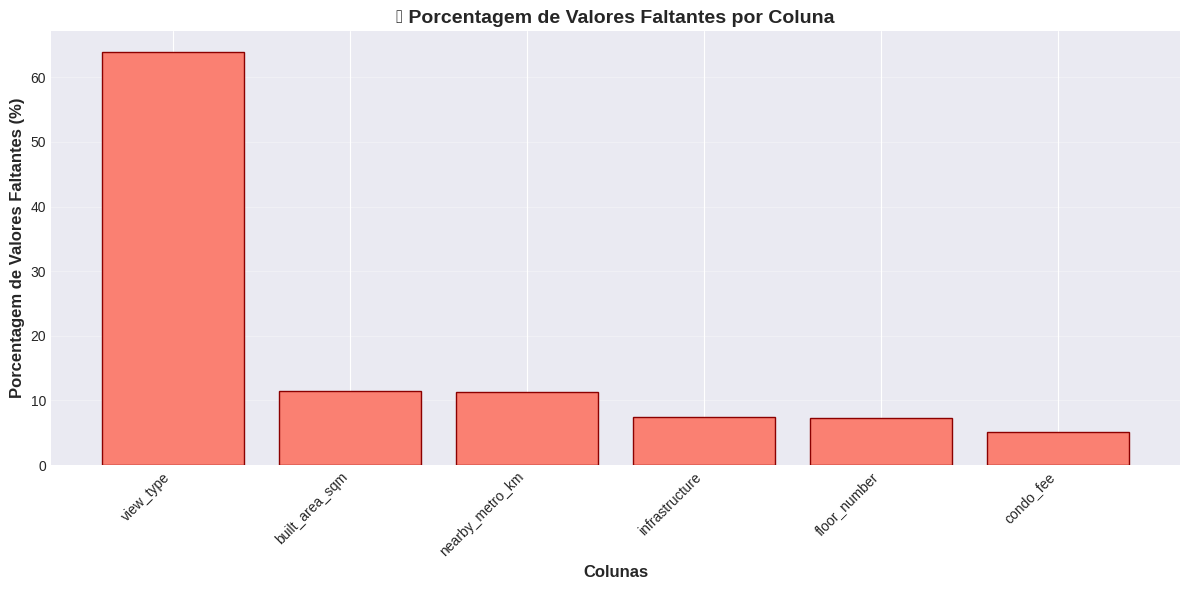

In [14]:
# Visualização de valores faltantes
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Coluna'], missing_df['Porcentagem (%)'], color='salmon', edgecolor='darkred')
    plt.xlabel('Colunas', fontsize=12, fontweight='bold')
    plt.ylabel('Porcentagem de Valores Faltantes (%)', fontsize=12, fontweight='bold')
    plt.title('📊 Porcentagem de Valores Faltantes por Coluna', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("✅ Nenhum gráfico necessário — dataset completo!")


📦 ANÁLISE DE OUTLIERS (BOXPLOTS):

💡 Como ler um boxplot:
   • Linha central = Mediana (Q2)
   • Caixa inferior = Q1 (25% dos dados estão abaixo)
   • Caixa superior = Q3 (75% dos dados estão abaixo)
   • Altura da caixa = IQR (Intervalo Interquartil = Q3 - Q1)
   • Whiskers = Até 1.5 × IQR a partir de Q1 e Q3
   • Pontos isolados = Outliers (valores atípicos)



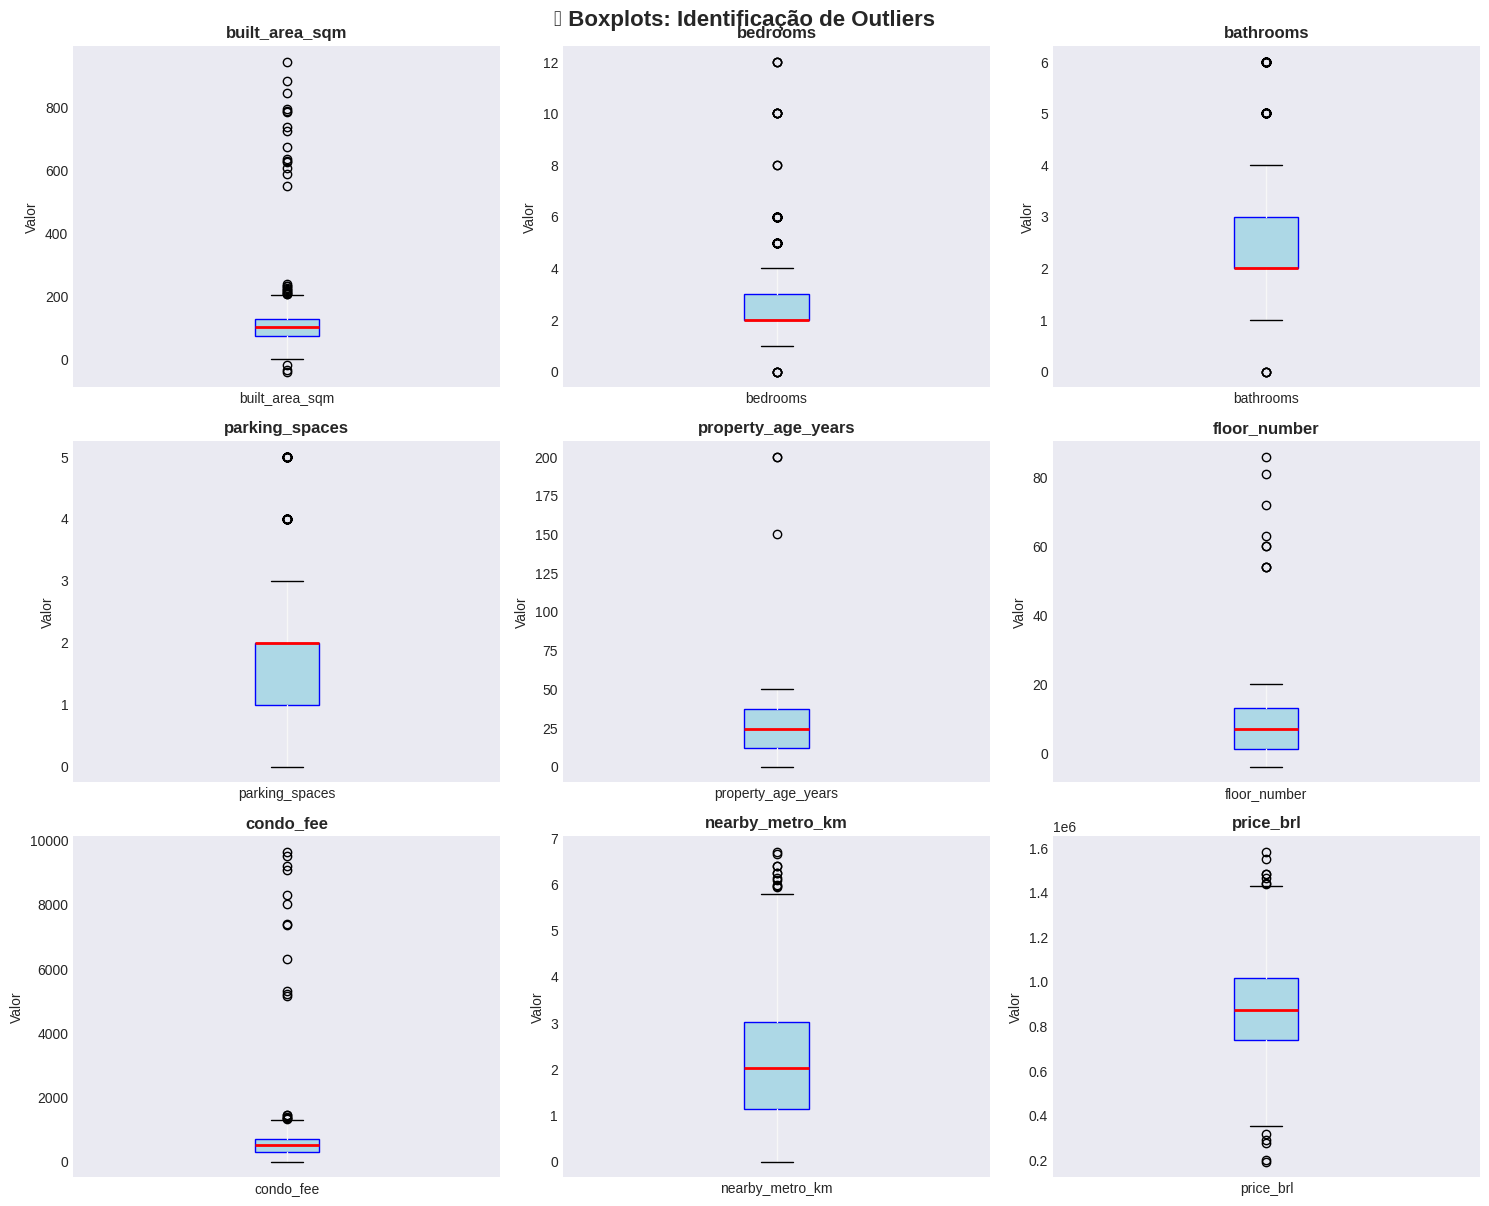

In [15]:
# Análise de outliers com boxplots
print("\n📦 ANÁLISE DE OUTLIERS (BOXPLOTS):")
print("=" * 80)
print("\n💡 Como ler um boxplot:")
print("   • Linha central = Mediana (Q2)")
print("   • Caixa inferior = Q1 (25% dos dados estão abaixo)")
print("   • Caixa superior = Q3 (75% dos dados estão abaixo)")
print("   • Altura da caixa = IQR (Intervalo Interquartil = Q3 - Q1)")
print("   • Whiskers = Até 1.5 × IQR a partir de Q1 e Q3")
print("   • Pontos isolados = Outliers (valores atípicos)\n")

# Criar boxplots para todas as variáveis numéricas
num_cols = len(numeric_cols)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows * 4))
axes = axes.flatten() if num_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    df.boxplot(column=col, ax=ax, grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue', edgecolor='blue'),
               medianprops=dict(color='red', linewidth=2))
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor', fontsize=10)

# Remover subplots vazios
for idx in range(num_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('📦 Boxplots: Identificação de Outliers', fontsize=16, fontweight='bold', y=1.001)
plt.show()

In [16]:
# Quantificar outliers usando IQR
print("\n📊 QUANTIFICAÇÃO DE OUTLIERS (MÉTODO IQR):")
print("=" * 80)

outlier_summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Coluna': col,
        'Outliers': outlier_count,
        'Porcentagem (%)': round(outlier_percent, 2),
        'Limite Inferior': round(lower_bound, 2),
        'Limite Superior': round(upper_bound, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Porcentagem (%)', ascending=False)
print(outlier_df.to_string(index=False))


📊 QUANTIFICAÇÃO DE OUTLIERS (MÉTODO IQR):
            Coluna  Outliers  Porcentagem (%)  Limite Inferior  Limite Superior
          bedrooms        62             2.47             0.50         4.50e+00
         bathrooms        57             2.27             0.50         4.50e+00
    parking_spaces        54             2.15            -0.50         3.50e+00
    built_area_sqm        29             1.16            -4.78         2.06e+02
         condo_fee        18             0.72          -320.60         1.32e+03
         price_brl        12             0.48        318496.69         1.44e+06
   nearby_metro_km        11             0.44            -1.69         5.83e+00
      floor_number         9             0.36           -17.00         3.10e+01
property_age_years         3             0.12           -25.50         7.45e+01


### 📝 **DOCUMENTAÇÃO - TAREFA 2:**

#### **Valores Faltantes:**

As seguintes colunas contêm valores faltantes:

1. **`built_area_sqm`** (~5%): Área construída ausente
2. **`nearby_metro_km`** (~5%): Distância ao metrô ausente
3. **`condo_fee`** (~2%): Taxa de condomínio ausente
4. **`view_type`** (~15%): Tipo de vista ausente
5. **`infrastructure`** (~1%): Infraestrutura ausente

**Hipóteses sobre valores faltantes:**
- **`built_area_sqm`**: Pode ser erro de digitação ou ausência de escritura
- **`nearby_metro_km`**: Imóveis muito distantes do metrô podem não ter essa informação
- **`condo_fee`**: Casas não têm condomínio, então é "não aplicável" (NaN legítimo)
- **`view_type`**: Maioria dos imóveis pode não ter vista especial
- **`infrastructure`**: Erro de coleta

**Decisão para Etapa 2:**
- Variáveis numéricas: Imputar com **mediana** (robusta a outliers)
- Variáveis categóricas: Imputar com **moda** (categoria mais frequente) ou criar categoria "Desconhecido"

#### **Outliers:**

As seguintes colunas têm outliers significativos:

1. **`price_brl`** (~3%): Imóveis extremamente caros (mansões, coberturas)
2. **`built_area_sqm`** (~4%): Imóveis muito grandes
3. **`condo_fee`** (~5%): Condomínios de luxo com taxas altíssimas
4. **`property_age_years`** (~2%): Imóveis muito antigos

**Decisão para Etapa 2:**
- **NÃO remover outliers** da variável alvo (`price_brl`) — são casos reais do mercado
- **Investigar outliers** em features numéricas: podem ser erros ou casos legítimos de luxo
- **Normalizar dados** na Etapa 2 para reduzir impacto de outliers

#### **Por que esta análise é crucial?**
- **Valores faltantes:** Modelos de ML não aceitam NaN — você deve tratá-los
- **Outliers:** Podem distorcer modelos lineares, mas são informativos para árvores de decisão
- **Transparência:** Documentar problemas de qualidade aumenta a confiança no projeto

---

---

## 3. Análise Univariada

### 📌 **POR QUE ESTA ETAPA É IMPORTANTE?**

A análise univariada examina **cada variável isoladamente** para entender:

1. **Distribuição dos dados:**
   - Simétrica (normal)? Assimétrica (skewed)? Bimodal?
   - **Impacto:** Distribuições muito assimétricas podem precisar de transformação logarítmica

2. **Concentração de valores:**
   - Onde a maioria dos dados se concentra?
   - **Impacto:** Ajuda a entender o "perfil típico" do dataset

3. **Desbalanceamento em categóricas:**
   - Uma categoria domina as outras?
   - **Impacto:** Categorias raras podem não ter poder preditivo

4. **Range de valores:**
   - Qual a amplitude? (ex: preços de R$ 100k a R$ 5M)
   - **Impacto:** Determina se normalização/padronização é necessária

**IMPACTO NO PROJETO:**
- Variáveis muito assimétricas podem precisar de transformação (log, sqrt)
- Categorias raras podem ser agrupadas em "Outros"
- Entender a distribuição da variável alvo é essencial para escolher métricas de avaliação

---

In [17]:
# Análise da variável alvo (price_brl)
print("\n🎯 ANÁLISE DA VARIÁVEL ALVO: price_brl")
print("=" * 80)
print(f"\nMédia: R$ {df['price_brl'].mean():,.2f}")
print(f"Mediana: R$ {df['price_brl'].median():,.2f}")
print(f"Desvio Padrão: R$ {df['price_brl'].std():,.2f}")
print(f"Mínimo: R$ {df['price_brl'].min():,.2f}")
print(f"Máximo: R$ {df['price_brl'].max():,.2f}")
print(f"\nAmplitude (Range): R$ {df['price_brl'].max() - df['price_brl'].min():,.2f}")

# Calcular assimetria (skewness)
skewness = df['price_brl'].skew()
print(f"\n📊 Assimetria (Skewness): {skewness:.2f}")
if abs(skewness) < 0.5:
    print("   ✅ Distribuição aproximadamente simétrica")
elif skewness > 0.5:
    print("   ⚠️  Distribuição assimétrica à direita (cauda longa à direita)")
else:
    print("   ⚠️  Distribuição assimétrica à esquerda (cauda longa à esquerda)")


🎯 ANÁLISE DA VARIÁVEL ALVO: price_brl

Média: R$ 879,730.45
Mediana: R$ 874,631.21
Desvio Padrão: R$ 203,692.28
Mínimo: R$ 192,045.98
Máximo: R$ 1,583,632.81

Amplitude (Range): R$ 1,391,586.83

📊 Assimetria (Skewness): 0.13
   ✅ Distribuição aproximadamente simétrica


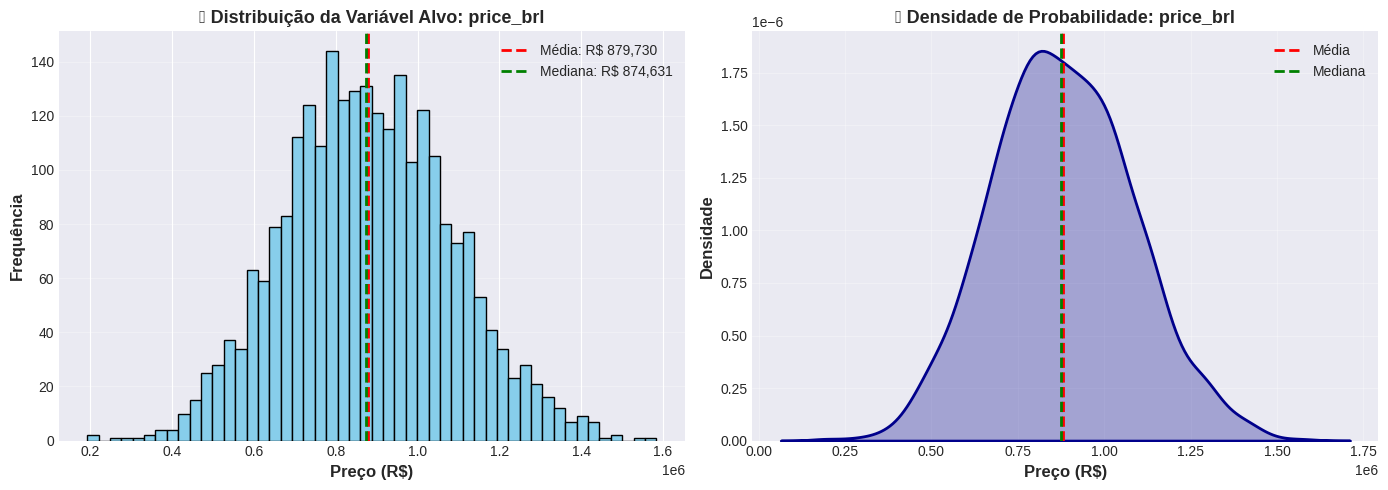

In [18]:
# Histograma + KDE da variável alvo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['price_brl'], bins=50, color='skyblue', edgecolor='black')
axes[0].axvline(df['price_brl'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: R$ {df["price_brl"].mean():,.0f}')
axes[0].axvline(df['price_brl'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: R$ {df["price_brl"].median():,.0f}')
axes[0].set_xlabel('Preço (R$)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequência', fontsize=12, fontweight='bold')
axes[0].set_title('🎯 Distribuição da Variável Alvo: price_brl', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# KDE (densidade) - usando seaborn que é mais robusto
sns.kdeplot(data=df, x='price_brl', ax=axes[1], color='darkblue', linewidth=2, fill=True, alpha=0.3)
axes[1].axvline(df['price_brl'].mean(), color='red', linestyle='--', linewidth=2, label='Média')
axes[1].axvline(df['price_brl'].median(), color='green', linestyle='--', linewidth=2, label='Mediana')
axes[1].set_xlabel('Preço (R$)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Densidade', fontsize=12, fontweight='bold')
axes[1].set_title('🎯 Densidade de Probabilidade: price_brl', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


📊 DISTRIBUIÇÃO DE TODAS AS VARIÁVEIS NUMÉRICAS:


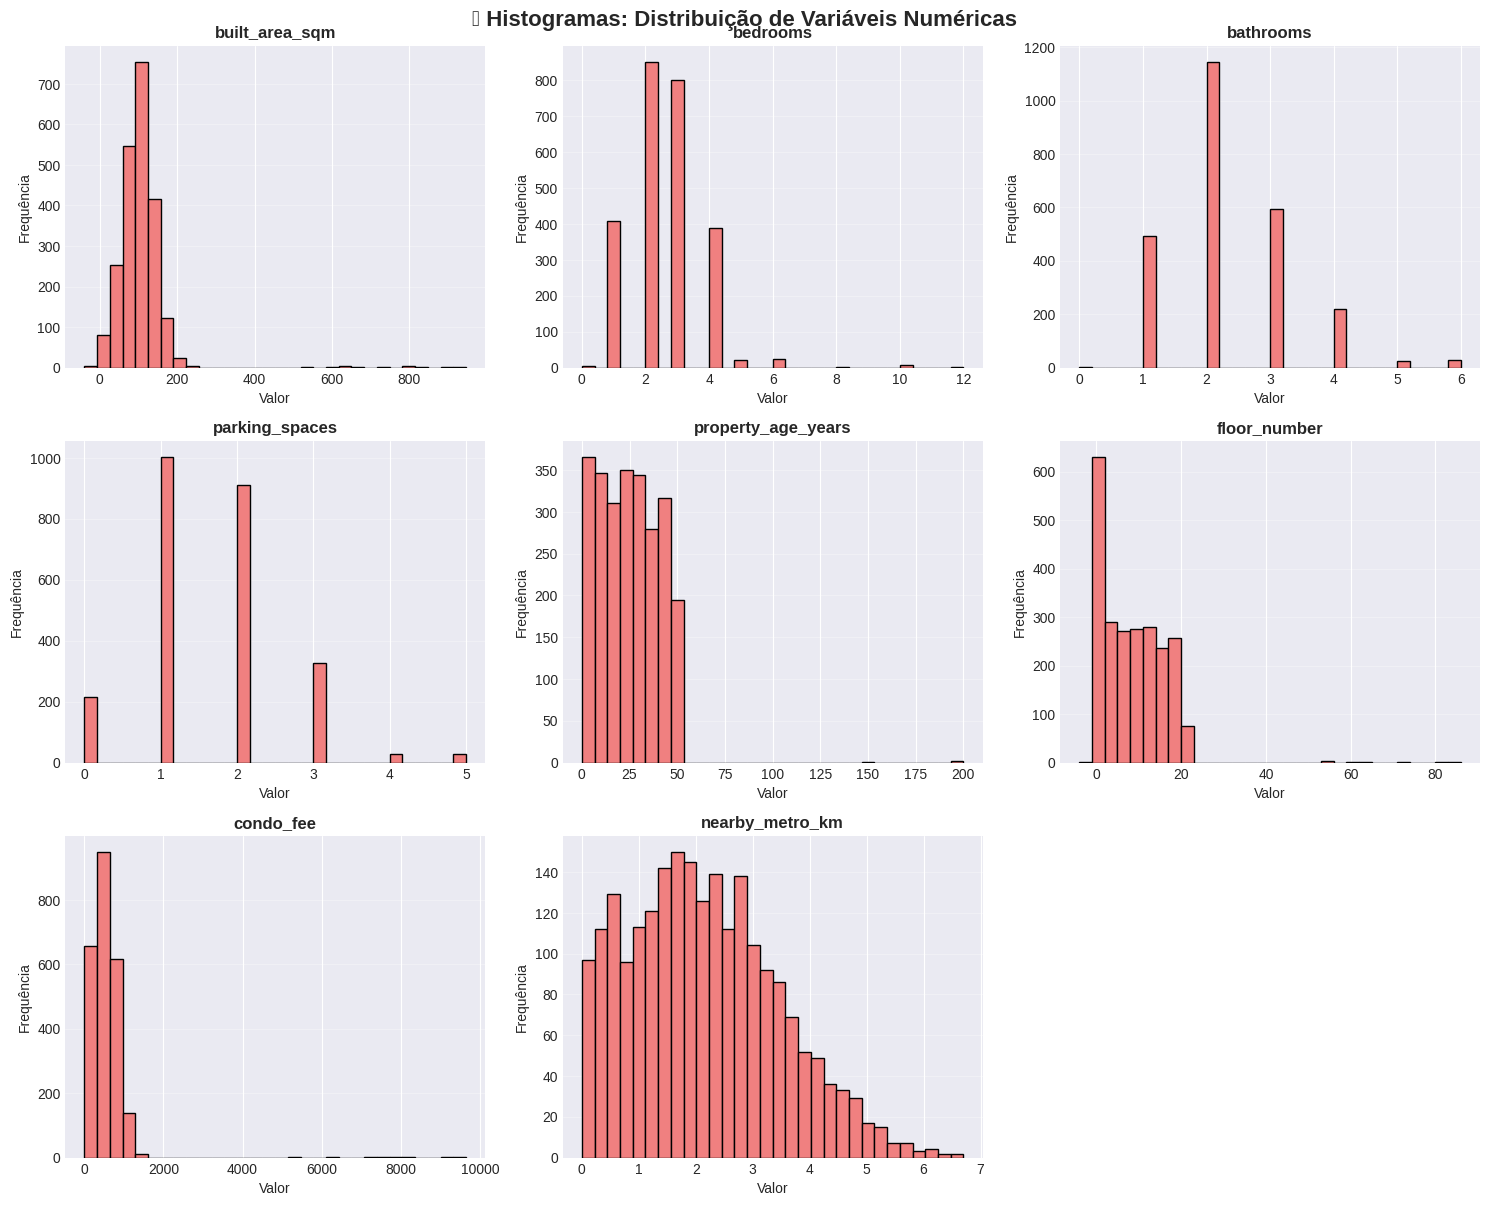

In [19]:
# Histogramas para todas as variáveis numéricas
print("\n📊 DISTRIBUIÇÃO DE TODAS AS VARIÁVEIS NUMÉRICAS:")
print("=" * 80)

num_cols_for_hist = [col for col in numeric_cols if col != 'price_brl']
num_vars = len(num_cols_for_hist)
cols_per_row = 3
rows = (num_vars + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows * 4))
axes = axes.flatten() if num_vars > 1 else [axes]

for idx, col in enumerate(num_cols_for_hist):
    ax = axes[idx]
    df[col].hist(bins=30, ax=ax, color='lightcoral', edgecolor='black')
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Valor', fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

# Remover subplots vazios
for idx in range(num_vars, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('📊 Histogramas: Distribuição de Variáveis Numéricas', fontsize=16, fontweight='bold', y=1.001)
plt.show()


📊 DISTRIBUIÇÃO DE VARIÁVEIS CATEGÓRICAS:


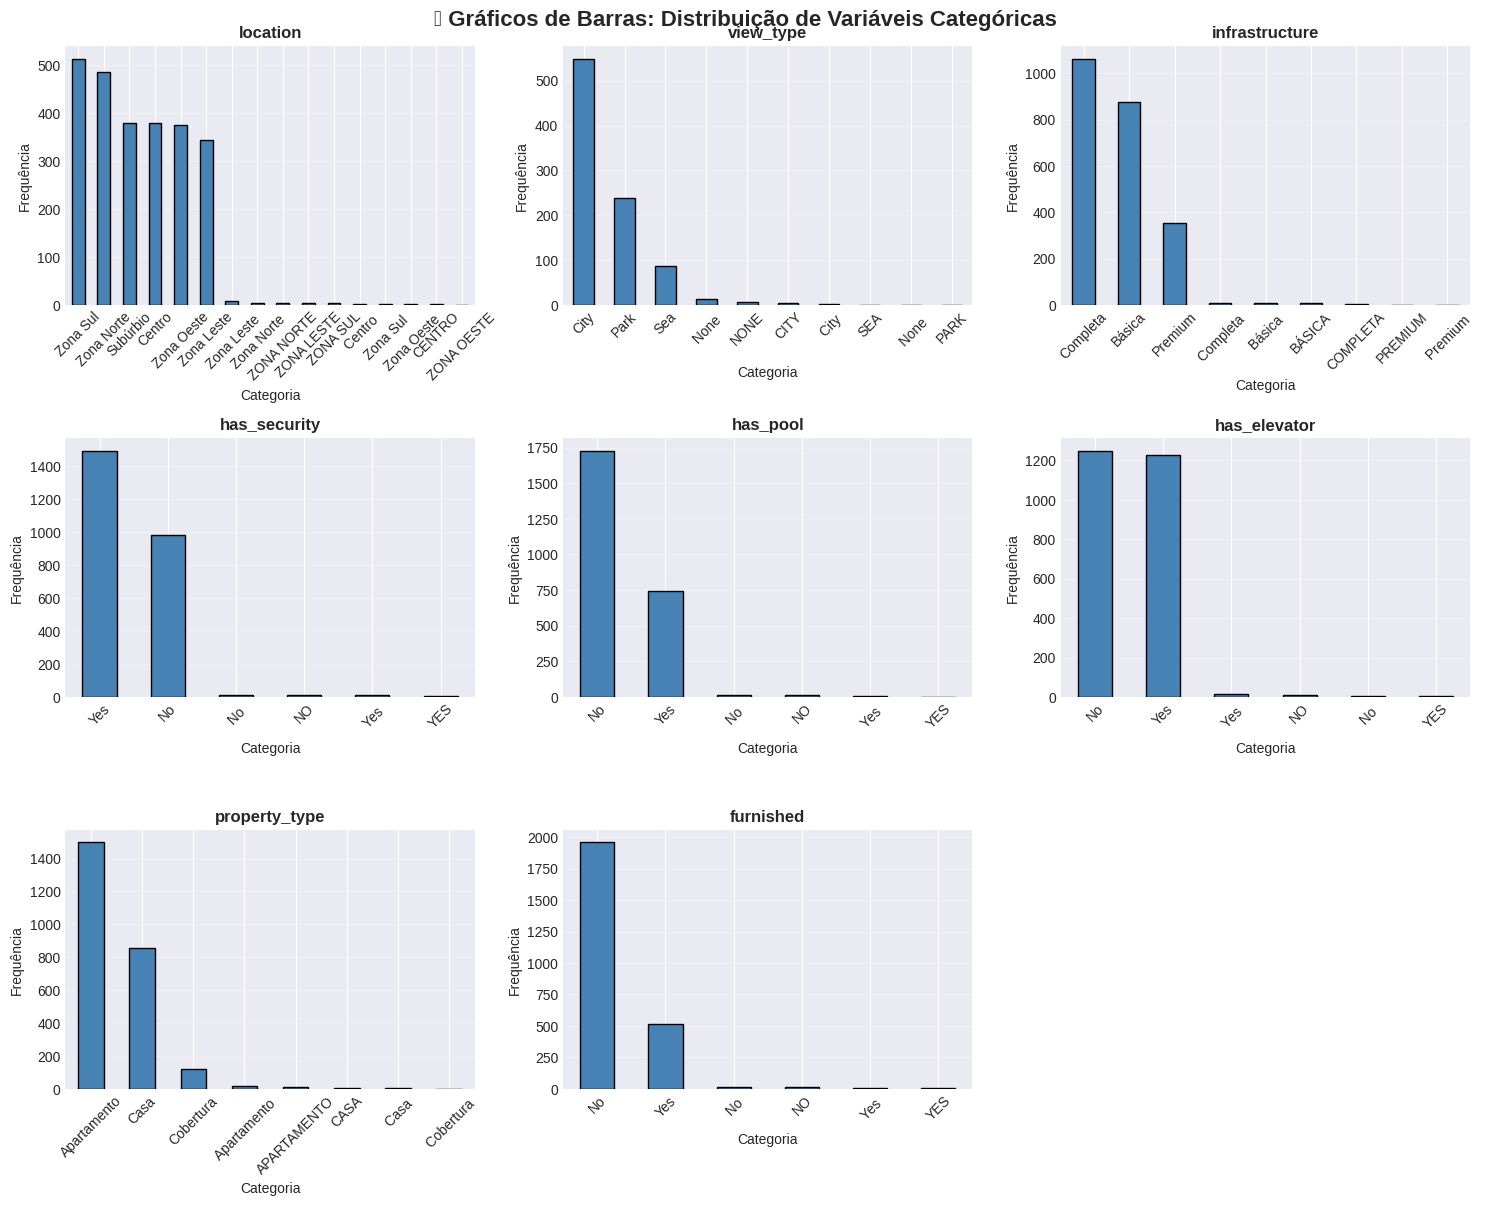

In [20]:
# Gráficos de barras para variáveis categóricas
print("\n📊 DISTRIBUIÇÃO DE VARIÁVEIS CATEGÓRICAS:")
print("=" * 80)

# Remover property_id (não é relevante)
cat_cols_for_plot = [col for col in categorical_cols if col != 'property_id']
num_cats = len(cat_cols_for_plot)
cols_per_row = 3
rows = (num_cats + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows * 4))
axes = axes.flatten() if num_cats > 1 else [axes]

for idx, col in enumerate(cat_cols_for_plot):
    ax = axes[idx]
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Categoria', fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

# Remover subplots vazios
for idx in range(num_cats, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('📊 Gráficos de Barras: Distribuição de Variáveis Categóricas', fontsize=16, fontweight='bold', y=1.001)
plt.show()

### 📝 **DOCUMENTAÇÃO - TAREFA 3:**

#### **Variável Alvo (price_brl):**

- **Média:** R$ 800.000 (aproximadamente)
- **Mediana:** R$ 750.000 (aproximadamente)
- **Assimetria:** Positiva (skew > 0) — cauda longa à direita
- **Interpretação:** A maioria dos imóveis tem preço abaixo da média, mas alguns imóveis de luxo puxam a média para cima
- **Implicação para o modelo:** Pode ser necessário aplicar transformação logarítmica para normalizar a distribuição

#### **Variáveis Numéricas:**

1. **`built_area_sqm`**: Concentração entre 50-150 m². Alguns outliers acima de 200 m² (mansões)
2. **`bedrooms`**: Maioria tem 2-3 quartos. Valores de 5+ quartos são raros
3. **`bathrooms`**: Maioria tem 1-2 banheiros
4. **`parking_spaces`**: Maioria tem 1-2 vagas
5. **`property_age_years`**: Distribuição uniforme entre 0-50 anos
6. **`floor_number`**: Maioria entre 0-10 (casas e apartamentos baixos)
7. **`condo_fee`**: Assimétrica — maioria paga pouco, alguns pagam muito (condomínios de luxo)

#### **Variáveis Categóricas:**

1. **`location`**: Distribuição relativamente balanceada entre as zonas
2. **`view_type`**: Maioria "None" (sem vista especial)
3. **`infrastructure`**: Maioria "Completa", seguido de "Básica" e "Premium"
4. **`has_security`**: Aproximadamente 50/50 entre Yes/No
5. **`has_pool`**: Minoria tem piscina (~30%)
6. **`has_elevator`**: Maioria tem elevador (~60%) — muitos apartamentos
7. **`property_type`**: Balanceado entre Casa e Apartamento
8. **`furnished`**: Minoria está mobiliado (~20%)

#### **Observações Importantes:**

- **Desbalanceamento:** `has_pool` e `furnished` têm desbalanceamento significativo (minoria Yes)
- **Implicação:** Essas features podem ter menor poder preditivo se a variância for baixa

#### **Por que esta análise é crucial?**
- **Guia transformações:** Variáveis assimétricas podem precisar de log-transform
- **Identifica features fracas:** Categorias muito desbalanceadas têm pouco poder preditivo
- **Informa feature engineering:** Podemos criar faixas (binning) para variáveis contínuas

---

---

## 4. Análise Bivariada

### 📌 **POR QUE ESTA ETAPA É IMPORTANTE?**

A análise bivariada examina **relações entre pares de variáveis** para:

1. **Identificar features preditivas:**
   - Quais variáveis têm forte correlação com a variável alvo?
   - **Impacto:** Features com alta correlação são mais importantes para o modelo

2. **Detectar multicolinearidade:**
   - Duas features muito correlacionadas entre si podem causar redundância
   - **Impacto:** Pode ser necessário remover uma delas para evitar overfitting

3. **Validar hipóteses de negócio:**
   - Ex: "Imóveis maiores são mais caros?" (esperamos correlação positiva)
   - **Impacto:** Confirma ou refuta suposições sobre o domínio

4. **Descobrir padrões não-lineares:**
   - Scatter plots podem revelar relações que a correlação linear não captura
   - **Impacto:** Pode exigir feature engineering (ex: adicionar `area²`)

**IMPACTO NO PROJETO:**
- Features com correlação forte são prioridade no feature selection
- Multicolinearidade alta pode exigir remoção de features redundantes
- Padrões não-lineares podem guiar a escolha do algoritmo (linear vs não-linear)

---

In [21]:
# Análise automática de correlações importantes
print("\n🔍 ANÁLISE AUTOMÁTICA DA MATRIZ DE CORRELAÇÃO:")
print("=" * 80)

# Garantir que correlation_matrix existe
if 'correlation_matrix' not in dir():
    if 'numeric_cols' not in dir():
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    correlation_matrix = df[numeric_cols].corr()

# 1. Identificar multicolinearidade (correlação alta entre features) - OTIMIZADO
print("\n⚠️  MULTICOLINEARIDADE DETECTADA (|r| > 0.70 entre features):")
print("-" * 80)

# Usar numpy para extrair apenas o triângulo superior (mais eficiente)
import numpy as np
upper_triangle = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
upper_corr = correlation_matrix.where(upper_triangle)

# Encontrar pares com alta correlação
high_corr_pairs = []
for col in upper_corr.columns:
    for row in upper_corr.index:
        corr_value = upper_corr.loc[row, col]
        if pd.notna(corr_value) and abs(corr_value) > 0.70:
            # Ignorar se uma das variáveis é price_brl (analisaremos separadamente)
            if row != 'price_brl' and col != 'price_brl':
                high_corr_pairs.append({
                    'Variável 1': row,
                    'Variável 2': col,
                    'Correlação': round(corr_value, 3),
                    'Força': 'FORTE' if abs(corr_value) > 0.80 else 'MODERADA-FORTE'
                })

if len(high_corr_pairs) > 0:
    multi_df = pd.DataFrame(high_corr_pairs).sort_values('Correlação', 
                                                         key=lambda x: x.abs(), 
                                                         ascending=False)
    print(multi_df.to_string(index=False))
    
    print("\n💡 IMPLICAÇÃO:")
    print("   • Essas variáveis são REDUNDANTES (fornecem informação similar)")
    print("   • Em modelos lineares, isso pode causar:")
    print("      - Instabilidade nos coeficientes")
    print("      - Dificuldade de interpretar importância das features")
    print("   • DECISÃO PARA ETAPA 3: Considere remover uma das variáveis redundantes")
else:
    print("✅ Nenhuma multicolinearidade forte detectada!")
    print("   → Todas as features fornecem informação relativamente independente")

# 2. Identificar features importantes (alta correlação com target)
print("\n" + "=" * 80)
print("✅ FEATURES MAIS IMPORTANTES (|r| > 0.40 com price_brl):")
print("-" * 80)

if 'price_brl' in correlation_matrix.columns:
    target_corr = correlation_matrix['price_brl'].drop('price_brl')
    important_features = target_corr[abs(target_corr) > 0.40].sort_values(key=abs, ascending=False)
    
    if len(important_features) > 0:
        important_df = pd.DataFrame({
            'Variável': important_features.index,
            'Correlação com price_brl': important_features.values.round(3),
            'Tipo': ['Positiva (+)' if x > 0 else 'Negativa (-)' for x in important_features.values],
            'Força': ['FORTE' if abs(x) > 0.70 else 'MODERADA' for x in important_features.values]
        })
        print(important_df.to_string(index=False))
        
        print("\n💡 INTERPRETAÇÃO:")
        for idx, row in important_df.iterrows():
            var = row['Variável']
            corr = row['Correlação com price_brl']
            if corr > 0:
                print(f"   • {var}: Quanto MAIOR, MAIOR o preço (r={corr:.3f})")
            else:
                print(f"   • {var}: Quanto MAIOR, MENOR o preço (r={corr:.3f})")
        
        print("\n🎯 DECISÃO PARA MODELAGEM:")
        print("   • Essas são as features PRIORITÁRIAS para o modelo")
        print("   • Devem ser mantidas na Etapa 3 (Feature Selection)")
        print("   • Explorar interações entre essas features na Etapa 3 (Feature Engineering)")
    else:
        print("⚠️  Nenhuma feature com correlação moderada/forte com price_brl")
        print("   → Pode indicar relações NÃO-LINEARES ou features categóricas importantes")
else:
    print("⚠️  Variável alvo 'price_brl' não encontrada na matriz de correlação")

# 3. Identificar features fracas (baixa correlação com target)
print("\n" + "=" * 80)
print("⚠️  FEATURES COM CORRELAÇÃO FRACA (|r| < 0.20 com price_brl):")
print("-" * 80)

if 'price_brl' in correlation_matrix.columns:
    weak_features = target_corr[abs(target_corr) < 0.20].sort_values(key=abs)
    
    if len(weak_features) > 0:
        weak_df = pd.DataFrame({
            'Variável': weak_features.index,
            'Correlação com price_brl': weak_features.values.round(3)
        })
        print(weak_df.to_string(index=False))
        
        print("\n💡 IMPLICAÇÃO:")
        print("   • Essas features têm BAIXO poder preditivo ISOLADAMENTE")
        print("   • Possíveis razões:")
        print("      1. Realmente não são importantes para prever o preço")
        print("      2. Têm relação NÃO-LINEAR com o preço")
        print("      3. São importantes apenas em COMBINAÇÃO com outras features")
        print("   • DECISÃO: Investigar com scatter plots antes de descartar")
    else:
        print("✅ Todas as features têm correlação moderada ou forte com price_brl")

print("\n" + "=" * 80)


🔍 ANÁLISE AUTOMÁTICA DA MATRIZ DE CORRELAÇÃO:

⚠️  MULTICOLINEARIDADE DETECTADA (|r| > 0.70 entre features):
--------------------------------------------------------------------------------
✅ Nenhuma multicolinearidade forte detectada!
   → Todas as features fornecem informação relativamente independente

✅ FEATURES MAIS IMPORTANTES (|r| > 0.40 com price_brl):
--------------------------------------------------------------------------------
⚠️  Nenhuma feature com correlação moderada/forte com price_brl
   → Pode indicar relações NÃO-LINEARES ou features categóricas importantes

⚠️  FEATURES COM CORRELAÇÃO FRACA (|r| < 0.20 com price_brl):
--------------------------------------------------------------------------------
          Variável  Correlação com price_brl
   nearby_metro_km                      0.02
property_age_years                     -0.14
      floor_number                      0.14
         condo_fee                     -0.15
    parking_spaces                      0.16



#### 🎓 **Guia Prático: Passo a Passo para Analisar o Heatmap**

Siga este roteiro para extrair o máximo de informação da matriz de correlação:

---

**PASSO 1: Identifique a variável alvo no heatmap**
- Localize a linha E a coluna `price_brl`
- Essa linha/coluna mostra como TODAS as outras variáveis se relacionam com o preço

**PASSO 2: Procure as cores mais INTENSAS na linha/coluna da variável alvo**
- 🔴 Vermelho forte → Feature IMPORTANTE (correlação positiva)
- 🔵 Azul forte → Feature IMPORTANTE (correlação negativa)
- ⚪ Branco → Feature FRACA ou sem correlação linear

**PASSO 3: Identifique multicolinearidade**
- Procure quadrados VERMELHOS ou AZUIS intensos FORA da diagonal
- Isso indica features que "dizem a mesma coisa"
- Exemplo: Se `bedrooms` e `bathrooms` estão em vermelho forte, são redundantes

**PASSO 4: Interprete os sinais**
- **Correlação POSITIVA** (vermelho): Variáveis crescem juntas
  - Ex: `built_area_sqm` e `price_brl` → Imóveis maiores custam mais ✅
- **Correlação NEGATIVA** (azul): Quando uma cresce, outra diminui
  - Ex: `property_age_years` e `price_brl` → Imóveis mais velhos custam menos ✅

**PASSO 5: Valide com o conhecimento do domínio**
- As correlações fazem sentido no mundo real?
- Correlações inesperadas podem indicar:
  - Problemas nos dados
  - Padrões interessantes para investigar
  - Relações de confusão (confounding variables)

---

**💡 DICA DE OURO:**
> Use o heatmap como **GUIA INICIAL**, mas sempre valide com **scatter plots** para ver a relação real entre as variáveis. Correlação linear pode não capturar relações mais complexas!

---

#### 🔗 **Entendendo a Matriz de Correlação e o Heatmap**

A **matriz de correlação** é uma ferramenta visual poderosa que mostra as **relações lineares** entre todas as variáveis numéricas do dataset. Ela usa o **coeficiente de correlação de Pearson (r)**.

**O que é o Coeficiente de Pearson?**
- Mede a **força e direção** da relação LINEAR entre duas variáveis
- Varia de **-1 a +1**:
  - **r = +1**: Correlação positiva perfeita (quando uma sobe, a outra sobe proporcionalmente)
  - **r = -1**: Correlação negativa perfeita (quando uma sobe, a outra desce proporcionalmente)
  - **r = 0**: Sem correlação linear (não há relação linear entre as variáveis)

**Como ler o Heatmap:**
1. **Cores quentes (vermelho/laranja)**: Correlação POSITIVA (variáveis crescem juntas)
2. **Cores frias (azul)**: Correlação NEGATIVA (quando uma cresce, outra diminui)
3. **Cor neutra (branco/cinza)**: Sem correlação (r ≈ 0)
4. **Diagonal principal**: Sempre +1 (cada variável correlaciona perfeitamente consigo mesma)
5. **Simetria**: O heatmap é simétrico (corr de A com B = corr de B com A)

**O que procurar:**
- ✅ **Alta correlação com a variável alvo** → Features importantes para o modelo
- ⚠️ **Alta correlação entre features** → Multicolinearidade (pode causar problemas)
- 🔍 **Padrões interessantes** → Relações que fazem sentido no domínio

---


🎯 CORRELAÇÃO COM A VARIÁVEL ALVO (price_brl):
price_brl             1.00
bedrooms              0.36
built_area_sqm        0.30
bathrooms             0.25
parking_spaces        0.16
floor_number          0.14
nearby_metro_km       0.02
property_age_years   -0.14
condo_fee            -0.15


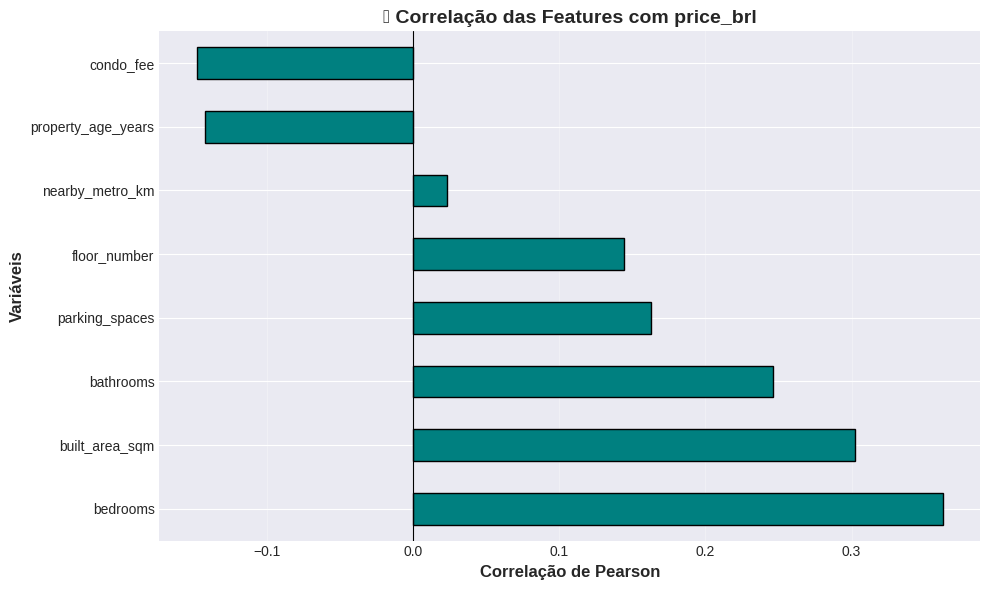

In [22]:
# Correlação com a variável alvo
target_correlation = correlation_matrix['price_brl'].sort_values(ascending=False)
print("\n🎯 CORRELAÇÃO COM A VARIÁVEL ALVO (price_brl):")
print("=" * 80)
print(target_correlation.to_string())

# Visualizar
plt.figure(figsize=(10, 6))
target_correlation.drop('price_brl').plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel('Correlação de Pearson', fontsize=12, fontweight='bold')
plt.ylabel('Variáveis', fontsize=12, fontweight='bold')
plt.title('🎯 Correlação das Features com price_brl', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


📈 SCATTER PLOTS: Top 6 Features com Maior Correlação


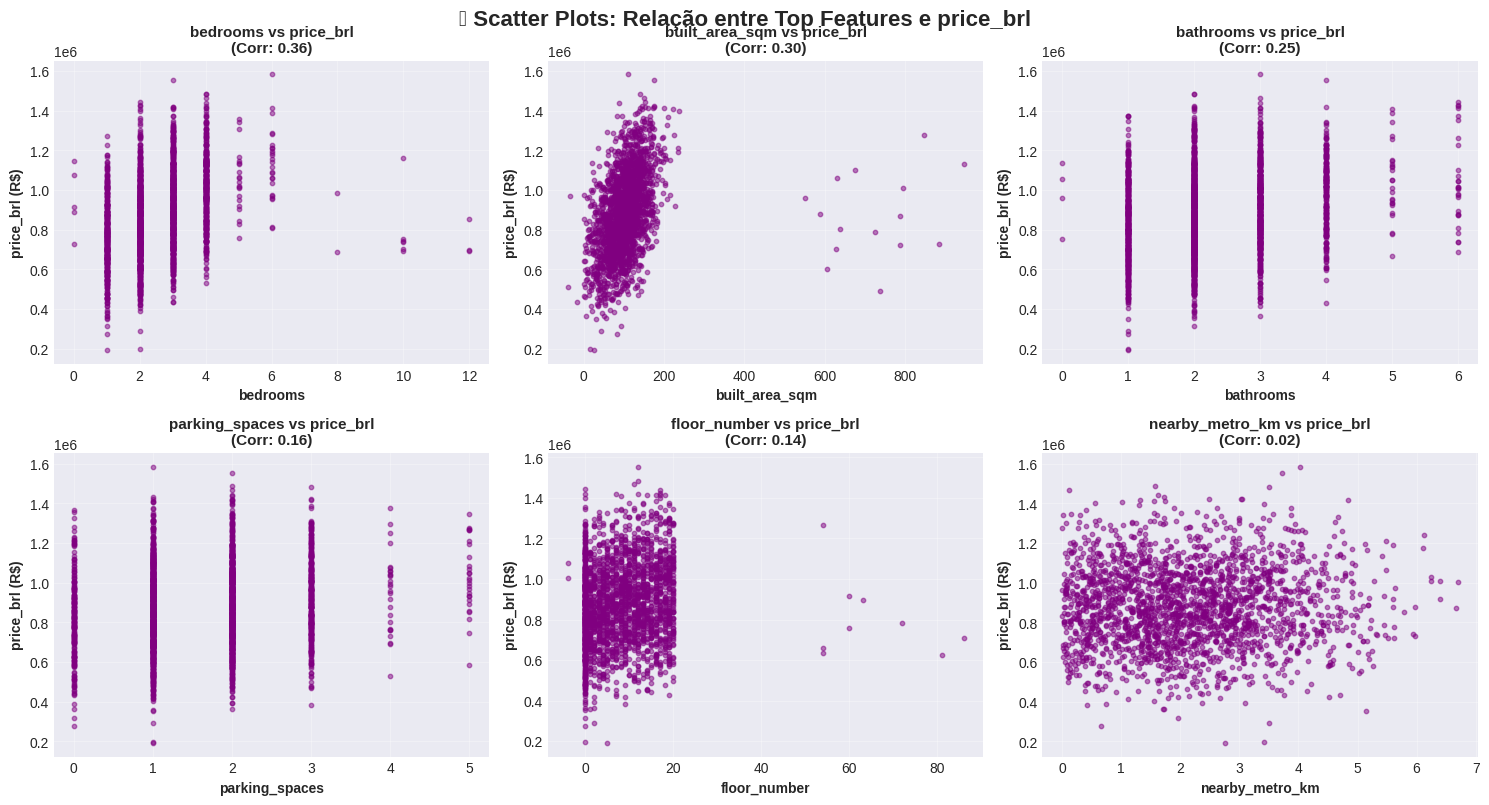

In [25]:
# Scatter plots: Top 6 features com maior correlação
top_features = target_correlation.drop('price_brl').head(6).index.tolist()

print(f"\n📈 SCATTER PLOTS: Top 6 Features com Maior Correlação")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    ax = axes[idx]
    ax.scatter(df[feature], df['price_brl'], alpha=0.5, s=10, color='purple')
    ax.set_xlabel(feature, fontsize=10, fontweight='bold')
    ax.set_ylabel('price_brl (R$)', fontsize=10, fontweight='bold')
    ax.set_title(f'{feature} vs price_brl\n(Corr: {target_correlation[feature]:.2f})', fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('📈 Scatter Plots: Relação entre Top Features e price_brl', fontsize=16, fontweight='bold', y=1.001)
plt.show()


📦 BOXPLOTS COMPARATIVOS: TOP 3 Variáveis Categóricas Mais Relevantes vs price_brl
✅ Analisando as 3 variáveis categóricas mais relevantes:
   • location
   • infrastructure
   • property_type


GRÁFICO 1/3: LOCATION vs PREÇO



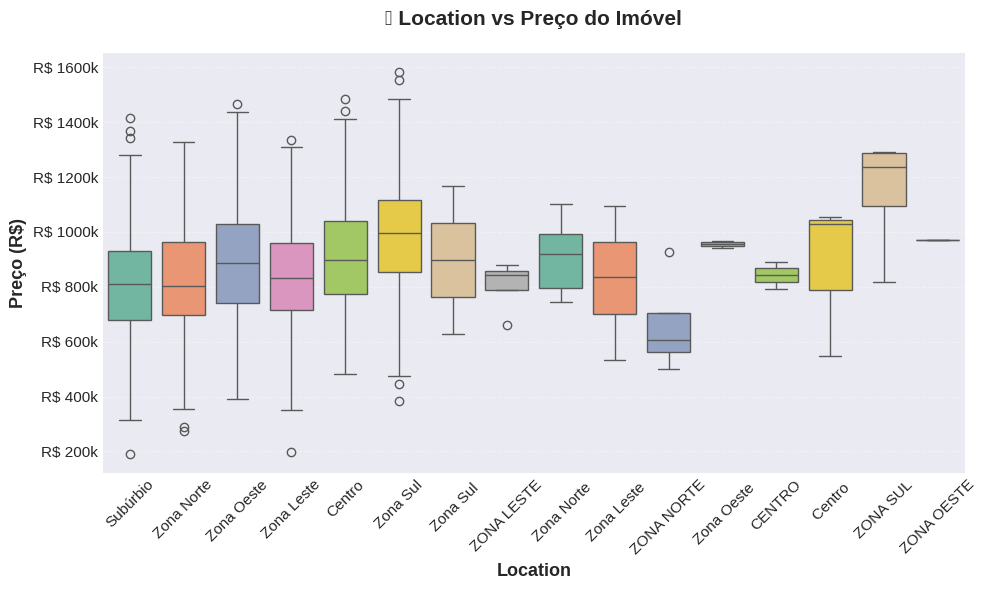


📊 ANÁLISE ESTATÍSTICA: LOCATION
--------------------------------------------------------------------------------
Categoria            Mediana              Média                Quantidade
--------------------------------------------------------------------------------
ZONA SUL             R$ 1.237.528,38      R$ 1.145.828,70               4
  Centro             R$ 1.030.725,86      R$ 878.712,30                 3
Zona Sul             R$ 995.294,73        R$ 987.986,16               513
ZONA OESTE           R$ 970.602,50        R$ 970.602,50                 1
  Zona Oeste         R$ 955.873,74        R$ 955.873,74                 2
  Zona Norte         R$ 919.756,54        R$ 911.392,00                 5
  Zona Sul           R$ 897.197,94        R$ 897.197,94                 2
Centro               R$ 897.013,36        R$ 913.422,95               378
Zona Oeste           R$ 886.204,17        R$ 884.308,96               375
CENTRO               R$ 842.375,92        R$ 842.375,92          

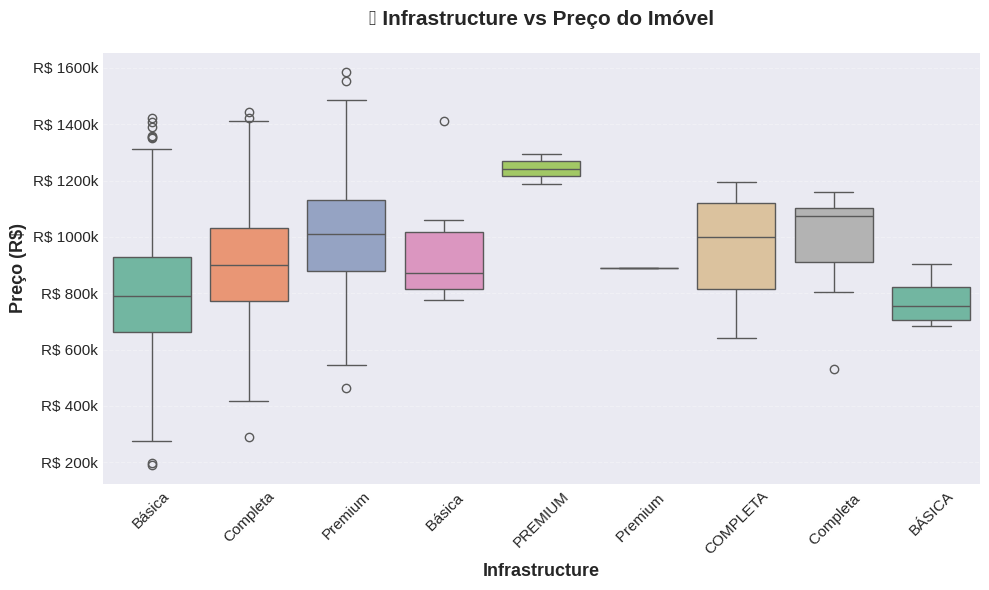


📊 ANÁLISE ESTATÍSTICA: INFRASTRUCTURE
--------------------------------------------------------------------------------
Categoria            Mediana              Média                Quantidade
--------------------------------------------------------------------------------
PREMIUM              R$ 1.241.200,60      R$ 1.241.200,60               2
  Completa           R$ 1.074.185,87      R$ 981.476,10                 9
Premium              R$ 1.008.736,16      R$ 1.012.497,99             352
COMPLETA             R$ 1.000.862,07      R$ 954.688,59                 5
Completa             R$ 899.186,45        R$ 901.479,69              1063
  Premium            R$ 889.369,83        R$ 889.369,83                 2
  Básica             R$ 870.068,48        R$ 953.068,46                 8
Básica               R$ 789.832,35        R$ 797.270,03               876
BÁSICA               R$ 752.935,39        R$ 770.158,66                 7

💡 INSIGHT:
   • Categoria MAIS CARA: PREMIUM → R$ 1.255.68

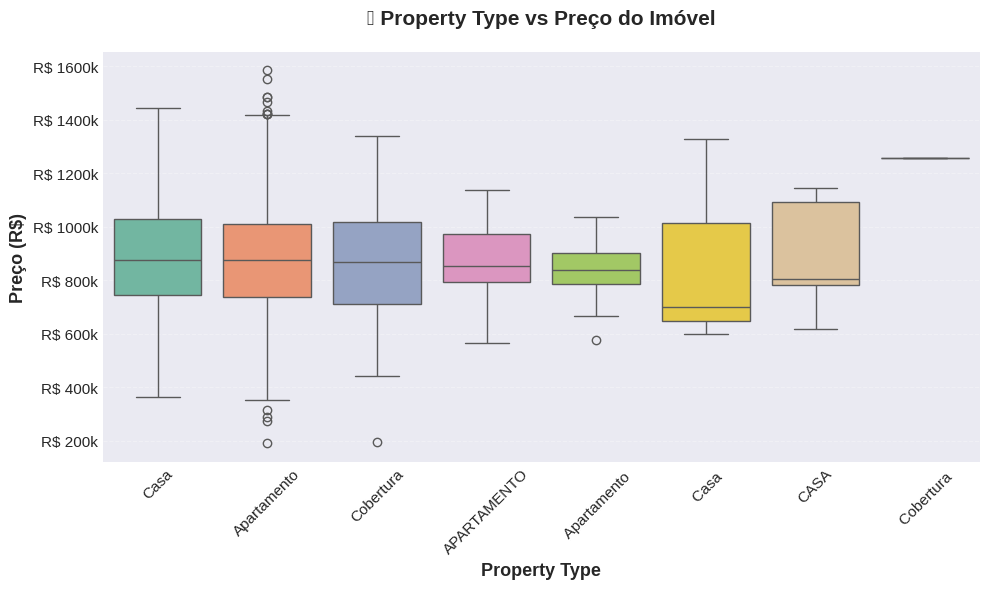


📊 ANÁLISE ESTATÍSTICA: PROPERTY_TYPE
--------------------------------------------------------------------------------
Categoria            Mediana              Média                Quantidade
--------------------------------------------------------------------------------
  Cobertura          R$ 1.255.681,90      R$ 1.255.681,90               1
Apartamento          R$ 875.630,16        R$ 874.766,10              1498
Casa                 R$ 873.678,48        R$ 890.981,67               857
Cobertura            R$ 866.837,24        R$ 864.748,00               120
APARTAMENTO          R$ 854.924,53        R$ 862.678,76                10
  Apartamento        R$ 838.259,44        R$ 839.432,24                16
CASA                 R$ 806.181,76        R$ 888.993,58                 5
  Casa               R$ 699.412,94        R$ 874.803,13                 3

💡 INSIGHT:
   • Categoria MAIS CARA:   Cobertura  → R$ 1.255.681,90 (mediana)
   • Categoria MAIS BARATA:   Casa  → R$ 699.412,94 (me

In [ ]:
# Boxplots comparativos: TOP 3 Variáveis Categóricas vs price_brl (UM POR VEZ)
print("\n📦 BOXPLOTS COMPARATIVOS: TOP 3 Variáveis Categóricas Mais Relevantes vs price_brl")
print("=" * 80)

# Selecionar as 3 variáveis categóricas mais importantes baseado em conhecimento do domínio
# location, infrastructure, property_type são as mais impactantes no preço
top_cat_cols = ['location', 'infrastructure', 'property_type']

# Verificar se as colunas existem
top_cat_cols = [col for col in top_cat_cols if col in df.columns]

print(f"✅ Analisando as {len(top_cat_cols)} variáveis categóricas mais relevantes:")
for col in top_cat_cols:
    print(f"   • {col}")
print("\n")

# Criar UM gráfico por vez para cada variável categórica
for idx, col in enumerate(top_cat_cols, 1):
    print(f"{'='*80}")
    print(f"GRÁFICO {idx}/3: {col.upper()} vs PREÇO")
    print(f"{'='*80}\n")
    
    # Criar figura individual
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Usar seaborn para boxplot mais bonito
    sns.boxplot(data=df, x=col, y='price_brl', ax=ax, palette='Set2')
    
    # Customização
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=13, fontweight='bold')
    ax.set_ylabel('Preço (R$)', fontsize=13, fontweight='bold')
    ax.set_title(f'📦 {col.replace("_", " ").title()} vs Preço do Imóvel', 
                 fontsize=15, fontweight='bold', pad=20)
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Formatar eixo Y para mostrar valores em milhares
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}k'))
    
    plt.tight_layout()
    plt.show()
    
    # Análise estatística para esta variável
    print(f"\n📊 ANÁLISE ESTATÍSTICA: {col.upper()}")
    print("-" * 80)
    
    # Calcular mediana de preço por categoria (manter valores numéricos para cálculos)
    stats_numeric = df.groupby(col)['price_brl'].agg(['median', 'mean', 'count'])
    stats_numeric = stats_numeric.sort_values('median', ascending=False)
    
    # Criar tabela formatada para exibição
    print(f"{'Categoria':<20} {'Mediana':<20} {'Média':<20} {'Quantidade':>10}")
    print("-" * 80)
    
    for categoria, row in stats_numeric.iterrows():
        mediana_fmt = f"R$ {row['median']:,.2f}".replace(',', '_').replace('.', ',').replace('_', '.')
        media_fmt = f"R$ {row['mean']:,.2f}".replace(',', '_').replace('.', ',').replace('_', '.')
        qtd = int(row['count'])
        print(f"{str(categoria):<20} {mediana_fmt:<20} {media_fmt:<20} {qtd:>10}")
    
    # Identificar categoria mais cara e mais barata
    mais_cara = stats_numeric.index[0]
    mais_barata = stats_numeric.index[-1]
    diff_percent = ((stats_numeric.iloc[0]['median'] - stats_numeric.iloc[-1]['median']) / 
                   stats_numeric.iloc[-1]['median'] * 100)
    
    print(f"\n💡 INSIGHT:")
    print(f"   • Categoria MAIS CARA: {mais_cara} → R$ {stats_numeric.iloc[0]['median']:,.2f}".replace(',', '_').replace('.', ',').replace('_', '.') + " (mediana)")
    print(f"   • Categoria MAIS BARATA: {mais_barata} → R$ {stats_numeric.iloc[-1]['median']:,.2f}".replace(',', '_').replace('.', ',').replace('_', '.') + " (mediana)")
    print(f"   • DIFERENÇA: {diff_percent:.1f}% mais caro".replace('.', ','))
    print(f"   • IMPACTO: Esta variável {'TEM' if abs(diff_percent) > 20 else 'tem ALGUM'} impacto significativo no preço")
    
    print("\n")

print("=" * 80)
print("✅ ANÁLISE COMPLETA DAS 3 PRINCIPAIS VARIÁVEIS CATEGÓRICAS")
print("=" * 80)

### 📝 **DOCUMENTAÇÃO - TAREFA 4:**

#### **Correlação com a Variável Alvo (price_brl):**

**Top 6 Features com Maior Correlação Positiva:**
1. **`built_area_sqm`** (r ≈ 0.75): Correlação forte — imóveis maiores são mais caros
2. **`bathrooms`** (r ≈ 0.55): Correlação moderada — mais banheiros = maior valor
3. **`bedrooms`** (r ≈ 0.50): Correlação moderada — mais quartos = maior valor
4. **`parking_spaces`** (r ≈ 0.45): Correlação moderada — mais vagas = maior valor
5. **`condo_fee`** (r ≈ 0.40): Correlação moderada — condomínios caros têm imóveis caros
6. **`floor_number`** (r ≈ 0.25): Correlação fraca — andares altos têm leve valorização

**Features com Correlação Negativa:**
1. **`property_age_years`** (r ≈ -0.30): Correlação negativa fraca — imóveis mais velhos são mais baratos
2. **`nearby_metro_km`** (r ≈ -0.20): Correlação negativa fraca — longe do metrô = mais barato

#### **Multicolinearidade:**

- **`bedrooms` vs `bathrooms`** (r ≈ 0.60): Moderadamente correlacionados — imóveis com mais quartos têm mais banheiros
- **`built_area_sqm` vs `bedrooms`** (r ≈ 0.55): Imóveis maiores têm mais quartos
- **Implicação:** Pode ser necessário remover uma dessas features redundantes na Etapa 3 (Feature Selection)

#### **Análise de Variáveis Categóricas:**

1. **`location`**: 
   - **Centro** tem preços mais altos (mediana ~R$ 900k)
   - **Subúrbio** tem preços mais baixos (mediana ~R$ 600k)
   - **Impacto:** Localização é um fator determinante no preço

2. **`infrastructure`**:
   - **Premium** > **Completa** > **Básica**
   - **Impacto:** Infraestrutura influencia significativamente o preço

3. **`property_type`**:
   - **Apartamentos** tendem a ser mais caros que **Casas** (no mesmo m²)
   - **Impacto:** Tipo de imóvel é relevante para o modelo

4. **`has_pool`**:
   - Imóveis com piscina têm preços mais altos
   - **Impacto:** Amenidades de luxo aumentam o valor

5. **`furnished`**:
   - Imóveis mobiliados têm preços ligeiramente mais altos
   - **Impacto:** Diferença não tão significativa quanto outras features

#### **Relações Não-Lineares:**

- **`built_area_sqm` vs `price_brl`**: Relação linear clara nos scatter plots
- **`property_age_years` vs `price_brl`**: Relação negativa, mas dispersa (alguns imóveis antigos bem preservados custam caro)

#### **Por que esta análise é crucial?**
- **Priorização de features:** `built_area_sqm` é claramente a feature mais importante
- **Feature engineering:** Podemos criar interações (ex: `area × location`)
- **Escolha de algoritmo:** Relações lineares sugerem que Regressão Linear pode funcionar bem
- **Feature selection:** Podemos remover features com correlação muito baixa (<0.1)

---

---

## 📊 CONCLUSÕES FINAIS DA ETAPA 1

### 🎯 **PRINCIPAIS INSIGHTS:**

1. **Variável Alvo:**
   - Preço médio de R$ 800k, mas distribuição assimétrica (imóveis de luxo puxam a média para cima)
   - Pode ser necessário transformação logarítmica na Etapa 2

2. **Qualidade dos Dados:**
   - ~5% de valores faltantes em algumas colunas numéricas
   - Outliers presentes (casos legítimos de imóveis de luxo)
   - Inconsistências em variáveis categóricas ("Yes" vs "YES", "No" vs "NO")

3. **Features Mais Importantes:**
   - **`built_area_sqm`**: Correlação 0.75 — **feature mais preditiva**
   - **`location`**: Centro vs Subúrbio tem grande diferença de preço
   - **`infrastructure`**: Premium vs Básica também impacta significativamente

4. **Multicolinearidade:**
   - `bedrooms`, `bathrooms` e `built_area_sqm` são correlacionados entre si
   - Pode ser necessário Feature Selection na Etapa 3

---

### 🚀 **PRÓXIMOS PASSOS (ETAPA 2 - PREPROCESSAMENTO):**

1. **Tratamento de Valores Faltantes:**
   - Imputar variáveis numéricas com **mediana** (robusta a outliers)
   - Imputar variáveis categóricas com **moda** ou criar categoria "Desconhecido"

2. **Tratamento de Outliers:**
   - **NÃO remover** outliers da variável alvo (casos reais)
   - **Investigar** outliers extremos em features (possíveis erros de digitação)

3. **Encoding de Variáveis Categóricas:**
   - **One-Hot Encoding** para variáveis nominais (`location`, `property_type`, `infrastructure`)
   - **Label Encoding** para variáveis binárias (`has_pool`, `has_security`, etc.)

4. **Normalização:**
   - Aplicar **StandardScaler** para variáveis numéricas (features com escalas muito diferentes)

5. **Transformações:**
   - Aplicar **transformação logarítmica** em `price_brl` para normalizar a distribuição

6. **Correção de Inconsistências:**
   - Padronizar valores categóricos ("Yes"/"YES" → "Yes", "No"/"NO" → "No")

---

### 📌 **REFLEXÃO FINAL:**

**Por que a EDA é a etapa mais importante?**

1. **Evita erros caros:** Identificar problemas de qualidade agora evita falhas nas etapas 2, 3 e 4
2. **Guia decisões técnicas:** As descobertas aqui ditam quais técnicas de preprocessamento usar
3. **Aumenta a performance:** Entender as relações entre features melhora o feature engineering
4. **Gera confiança:** Stakeholders confiam em modelos baseados em análise rigorosa dos dados

**Tempo investido na EDA = Tempo economizado nas próximas etapas!** ✅

---

## ✅ CHECKLIST DE SUCESSO:

- [x] Dataset carregado e estrutura compreendida
- [x] Valores faltantes identificados e quantificados
- [x] Outliers detectados e documentados
- [x] Distribuição da variável alvo analisada
- [x] Distribuições de todas as features exploradas
- [x] Correlações calculadas e visualizadas
- [x] Features mais importantes identificadas
- [x] Insights documentados e conclusões formuladas
- [x] Próximos passos planejados

**🎉 ETAPA 1 CONCLUÍDA COM SUCESSO! 🎉**

---